# Notebook imports

In [314]:
from os import walk
from os.path import join

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from bs4 import BeautifulSoup
from wordcloud import WordCloud
from PIL import Image

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings("ignore", category = UserWarning, module='bs4')

%matplotlib inline

# Constants

In [2]:
EXAMPLE_FILE = ('C:\\Users\\Nyambura\\Desktop\\Udemy\\Data Science\\[FreeCourseSite.com] Udemy - Complete 2020 Data Science & Machine Learning Bootcamp\\6. Pre-Process Text Data for a Naive Bayes Classifier to Filter Spam Emails Part 1\\2.1 SpamData.zip\\SpamData\\01_Processing\\practice_email.txt')
SPAM_1_PATH = ('C:\\Users\\Nyambura\\Desktop\\Udemy\\Data Science\\[FreeCourseSite.com] Udemy - Complete 2020 Data Science & Machine Learning Bootcamp\\6. Pre-Process Text Data for a Naive Bayes Classifier to Filter Spam Emails Part 1\\2.1 SpamData.zip\SpamData\\01_Processing\\spam_assassin_corpus\\spam_1')
SPAM_2_PATH = ('C:\\Users\\Nyambura\\Desktop\\Udemy\\Data Science\\[FreeCourseSite.com] Udemy - Complete 2020 Data Science & Machine Learning Bootcamp\\6. Pre-Process Text Data for a Naive Bayes Classifier to Filter Spam Emails Part 1\\2.1 SpamData.zip\SpamData\\01_Processing\\spam_assassin_corpus\\spam_2')
EASY_NONSPAM_1_PATH = ('C:\\Users\\Nyambura\\Desktop\\Udemy\\Data Science\\[FreeCourseSite.com] Udemy - Complete 2020 Data Science & Machine Learning Bootcamp\\6. Pre-Process Text Data for a Naive Bayes Classifier to Filter Spam Emails Part 1\\2.1 SpamData.zip\\SpamData\\01_Processing\\spam_assassin_corpus\\easy_ham_1')
EASY_NONSPAM_2_PATH = ('C:\\Users\\Nyambura\\Desktop\\Udemy\\Data Science\\[FreeCourseSite.com] Udemy - Complete 2020 Data Science & Machine Learning Bootcamp\\6. Pre-Process Text Data for a Naive Bayes Classifier to Filter Spam Emails Part 1\\2.1 SpamData.zip\\SpamData\\01_Processing\\spam_assassin_corpus\\easy_ham_2')

SPAM_CAT = 1
HAM_CAT = 0
VOCAB_SIZE = 2500

DATA_JSON_FILE = ('C:\\Users\\Nyambura\\Desktop\\Udemy\\Data Science\\[FreeCourseSite.com] Udemy - Complete 2020 Data Science & Machine Learning Bootcamp\\6. Pre-Process Text Data for a Naive Bayes Classifier to Filter Spam Emails Part 1\\2.1 SpamData.zip\\SpamData\\01_Processing\\practice_email-text-data.json')

WORD_ID_FILE = ('C:\\Users\\Nyambura\\Desktop\\Udemy\\Data Science\\[FreeCourseSite.com] Udemy - Complete 2020 Data Science & Machine Learning Bootcamp\\6. Pre-Process Text Data for a Naive Bayes Classifier to Filter Spam Emails Part 1\\2.1 SpamData.zip\\SpamData\\01_Processing\\word_by_id.csv')

TRAINING_DATA_SPARSE_MATRIX_FILE = ('C:\\Users\\Nyambura\\Desktop\\Udemy\\Data Science\\[FreeCourseSite.com] Udemy - Complete 2020 Data Science & Machine Learning Bootcamp\\6. Pre-Process Text Data for a Naive Bayes Classifier to Filter Spam Emails Part 1\\2.1 SpamData.zip\\SpamData\\02_Training\\train-data.txt')
TEST_DATA_SPARSE_MATRIX_FILE = ('C:\\Users\\Nyambura\\Desktop\\Udemy\\Data Science\\[FreeCourseSite.com] Udemy - Complete 2020 Data Science & Machine Learning Bootcamp\\6. Pre-Process Text Data for a Naive Bayes Classifier to Filter Spam Emails Part 1\\2.1 SpamData.zip\\SpamData\\02_Training\\test-data.txt')


TOKEN_SPAM_PROBABILITY_FILE = ('C:\\Users\\Nyambura\\Desktop\\Udemy\\Data Science\\[FreeCourseSite.com] Udemy - Complete 2020 Data Science & Machine Learning Bootcamp\\6. Pre-Process Text Data for a Naive Bayes Classifier to Filter Spam Emails Part 1\\2.1 SpamData.zip\\SpamData\\03_Testing\\probability_spam.txt')
TOKEN_NONSPAM_PROBABILITY_FILE = ('C:\\Users\\Nyambura\\Desktop\\Udemy\\Data Science\\[FreeCourseSite.com] Udemy - Complete 2020 Data Science & Machine Learning Bootcamp\\6. Pre-Process Text Data for a Naive Bayes Classifier to Filter Spam Emails Part 1\\2.1 SpamData.zip\\SpamData\\03_Testing\\probability_nonspam.txt')
TOKEN_ALL_PROBABILITY_FILE = ('C:\\Users\\Nyambura\\Desktop\\Udemy\\Data Science\\[FreeCourseSite.com] Udemy - Complete 2020 Data Science & Machine Learning Bootcamp\\6. Pre-Process Text Data for a Naive Bayes Classifier to Filter Spam Emails Part 1\\2.1 SpamData.zip\\SpamData\\03_Testing\\probability_all_tokens.txt')



TEST_FEATURE_MATRIX = ('C:\\Users\\Nyambura\\Desktop\\Udemy\\Data Science\\[FreeCourseSite.com] Udemy - Complete 2020 Data Science & Machine Learning Bootcamp\\6. Pre-Process Text Data for a Naive Bayes Classifier to Filter Spam Emails Part 1\\2.1 SpamData.zip\\SpamData\\03_Testing\\test_features.txt')
TEST_TARGET_FILE = ('C:\\Users\\Nyambura\\Desktop\\Udemy\\Data Science\\[FreeCourseSite.com] Udemy - Complete 2020 Data Science & Machine Learning Bootcamp\\6. Pre-Process Text Data for a Naive Bayes Classifier to Filter Spam Emails Part 1\\2.1 SpamData.zip\\SpamData\\03_Testing\\test-target.txt')



WHALE_FILE = ('C:\\Users\\Nyambura\\Desktop\\Udemy\\Data Science\\[FreeCourseSite.com] Udemy - Complete 2020 Data Science & Machine Learning Bootcamp\\6. Pre-Process Text Data for a Naive Bayes Classifier to Filter Spam Emails Part 1\\2.1 SpamData.zip\\SpamData\\01_Processing\\wordcloud_resources\\whale-icon.png')
SKULL_FILE = ('C:\\Users\\Nyambura\\Desktop\\Udemy\\Data Science\\[FreeCourseSite.com] Udemy - Complete 2020 Data Science & Machine Learning Bootcamp\\6. Pre-Process Text Data for a Naive Bayes Classifier to Filter Spam Emails Part 1\\2.1 SpamData.zip\\SpamData\\01_Processing\wordcloud_resources\\skull-icon.png')
THUMBS_UP_FILE = ('C:\\Users\\Nyambura\\Desktop\\Udemy\\Data Science\\[FreeCourseSite.com] Udemy - Complete 2020 Data Science & Machine Learning Bootcamp\\6. Pre-Process Text Data for a Naive Bayes Classifier to Filter Spam Emails Part 1\\2.1 SpamData.zip\\SpamData\\01_Processing\wordcloud_resources\\thumbs-up.png')
THUMBS_DOWN_FILE = ('C:\\Users\\Nyambura\\Desktop\\Udemy\\Data Science\\[FreeCourseSite.com] Udemy - Complete 2020 Data Science & Machine Learning Bootcamp\\6. Pre-Process Text Data for a Naive Bayes Classifier to Filter Spam Emails Part 1\\2.1 SpamData.zip\\SpamData\\01_Processing\wordcloud_resources\\thumbs-down.png')
CUSTOM_FONT_FILE = ('C:\\Users\\Nyambura\\Desktop\\Udemy\\Data Science\\[FreeCourseSite.com] Udemy - Complete 2020 Data Science & Machine Learning Bootcamp\\6. Pre-Process Text Data for a Naive Bayes Classifier to Filter Spam Emails Part 1\\2.1 SpamData.zip\\SpamData\\01_Processing\wordcloud_resources\\OpenSansCondensed-Bold.ttf')

# Reading files

In [3]:
stream = open(EXAMPLE_FILE)
message = stream.read()
stream.close()

print(message)

From exmh-workers-admin@redhat.com  Thu Aug 22 12:36:23 2002
Return-Path: <exmh-workers-admin@spamassassin.taint.org>
Delivered-To: zzzz@localhost.netnoteinc.com
Received: from localhost (localhost [127.0.0.1])
	by phobos.labs.netnoteinc.com (Postfix) with ESMTP id D03E543C36
	for <zzzz@localhost>; Thu, 22 Aug 2002 07:36:16 -0400 (EDT)
Received: from phobos [127.0.0.1]
	by localhost with IMAP (fetchmail-5.9.0)
	for zzzz@localhost (single-drop); Thu, 22 Aug 2002 12:36:16 +0100 (IST)
Received: from listman.spamassassin.taint.org (listman.spamassassin.taint.org [66.187.233.211]) by
    dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g7MBYrZ04811 for
    <zzzz-exmh@spamassassin.taint.org>; Thu, 22 Aug 2002 12:34:53 +0100
Received: from listman.spamassassin.taint.org (localhost.localdomain [127.0.0.1]) by
    listman.redhat.com (Postfix) with ESMTP id 8386540858; Thu, 22 Aug 2002
    07:35:02 -0400 (EDT)
Delivered-To: exmh-workers@listman.spamassassin.taint.org
Received: from int-mx1.corp

In [4]:
print(type(message))

<class 'str'>


In [5]:
stream = open(EXAMPLE_FILE)

is_body = False
lines = []

for line in stream:
    if is_body:
        lines.append(line)
    elif line == '\n':
        is_body = True

stream.close()

email_body = '\n'.join(lines)
print(email_body)

# print(lines)



Dear Mr Still



Good tidings to you and all your staff for the festive season ahead (Christmas).

Now to the crux of the matter-in-hand: I am a fully qualified Santa Claus and am wondering whether you might consider me to run my own "Santa's Grotto" in your store.

But WAIT! You're probably thinking: "What makes him so special?"

Well, first of all, I have made several changes to the characterisation of Father Christmas. Rather than greeting the children with shouts of "Ho, ho, ho!" I prefer to whisper the phrase "Dependence is not unfathomable in this cruel world we live in". In addition, my gifts are ALL hand-made, ranging from felt hoops to vanilla-pod holders.

You will note also, from the enclosed sketch, that I have radically redesigned Santa's outfit and have renamed my character "Lord Buckles". Would you be interested in employing me? I promise NEVER to let you down.

I look forward to hearing from you.



Best wishes

Robin Cooper

[Excerpt from the book: The Timewaster Let

# Generator functions

In [6]:
def generate_squares(N):
    for my_number in range(N):
        yield my_number ** 2

In [7]:
for i in generate_squares(5):
    print(i, end = ' ->')

0 ->1 ->4 ->9 ->16 ->

# Email body Extraction

In [8]:
def email_body_generator(path):
    
    for root, dirnames, filenames in walk(path):
        for file_name in filenames:
            
            filepath = join(root, file_name)
            
            stream = open(filepath, encoding='latin-1')

            is_body = False
            lines = []

            for line in stream:
                if is_body:
                    lines.append(line)
                elif line == '\n':
                    is_body = True

            stream.close()

            email_body = '\n'.join(lines)
            
            yield file_name, email_body


In [9]:
def df_from_directory(path, classification):
    rows = []
    row_names = []
    
    for file_name, email_body in email_body_generator(path):
        rows.append({'MESSAGE': email_body, 'CATEGORY': classification})
        row_names.append(file_name)
        
    return pd.DataFrame(rows, index=row_names)

In [10]:
spam_emails = df_from_directory(SPAM_1_PATH, 1)
spam_emails = spam_emails.append(df_from_directory(SPAM_2_PATH, 1))
spam_emails.head()

MESSAGE  \
00001.7848dde101aa985090474a91ec93fcf0  <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Tr...   
00002.d94f1b97e48ed3b553b3508d116e6a09  1) Fight The Risk of Cancer!\n\nhttp://www.adc...   
00003.2ee33bc6eacdb11f38d052c44819ba6c  1) Fight The Risk of Cancer!\n\nhttp://www.adc...   
00004.eac8de8d759b7e74154f142194282724  ##############################################...   
00005.57696a39d7d84318ce497886896bf90d  I thought you might like these:\n\n1) Slim Dow...   

                                        CATEGORY  
00001.7848dde101aa985090474a91ec93fcf0         1  
00002.d94f1b97e48ed3b553b3508d116e6a09         1  
00003.2ee33bc6eacdb11f38d052c44819ba6c         1  
00004.eac8de8d759b7e74154f142194282724         1  
00005.57696a39d7d84318ce497886896bf90d         1

In [11]:
spam_emails.shape

(1898, 2)

In [12]:
nonspam_emails = df_from_directory(EASY_NONSPAM_1_PATH, HAM_CAT)
nonspam_emails = nonspam_emails.append(df_from_directory(EASY_NONSPAM_2_PATH, HAM_CAT))
nonspam_emails.head()

MESSAGE  \
00001.7c53336b37003a9286aba55d2945844c      Date:        Wed, 21 Aug 2002 10:54:46 -05...   
00002.9c4069e25e1ef370c078db7ee85ff9ac  Martin A posted:\n\nTassos Papadopoulos, the G...   
00003.860e3c3cee1b42ead714c5c874fe25f7  Man Threatens Explosion In Moscow \n\n\n\nThur...   
00004.864220c5b6930b209cc287c361c99af1  Klez: The Virus That Won't Die\n\n \n\nAlready...   
00005.bf27cdeaf0b8c4647ecd61b1d09da613  >  in adding cream to spaghetti carbonara, whi...   

                                        CATEGORY  
00001.7c53336b37003a9286aba55d2945844c         0  
00002.9c4069e25e1ef370c078db7ee85ff9ac         0  
00003.860e3c3cee1b42ead714c5c874fe25f7         0  
00004.864220c5b6930b209cc287c361c99af1         0  
00005.bf27cdeaf0b8c4647ecd61b1d09da613         0

In [13]:
nonspam_emails.shape

(3901, 2)

In [14]:
data = pd.concat([spam_emails, nonspam_emails])
print("Shape of entire dataframe is ", data.shape)
data.head()

Shape of entire dataframe is  (5799, 2)


MESSAGE  \
00001.7848dde101aa985090474a91ec93fcf0  <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Tr...   
00002.d94f1b97e48ed3b553b3508d116e6a09  1) Fight The Risk of Cancer!\n\nhttp://www.adc...   
00003.2ee33bc6eacdb11f38d052c44819ba6c  1) Fight The Risk of Cancer!\n\nhttp://www.adc...   
00004.eac8de8d759b7e74154f142194282724  ##############################################...   
00005.57696a39d7d84318ce497886896bf90d  I thought you might like these:\n\n1) Slim Dow...   

                                        CATEGORY  
00001.7848dde101aa985090474a91ec93fcf0         1  
00002.d94f1b97e48ed3b553b3508d116e6a09         1  
00003.2ee33bc6eacdb11f38d052c44819ba6c         1  
00004.eac8de8d759b7e74154f142194282724         1  
00005.57696a39d7d84318ce497886896bf90d         1

In [15]:
data.tail()

MESSAGE  \
01396.61983fbe6ec43f55fd44e30fce24ffa6  http://news.bbc.co.uk/1/hi/england/2515127.stm...   
01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7  > >-- be careful when using this one.) Also, t...   
01398.169b51731fe569f42169ae8f948ec676  >>>>> "SM" == Skip Montanaro <skip@pobox.com> ...   
01399.ca6b00b7b341bbde9a9ea3dd6a7bf896  So then, "Mark Hammond" <mhammond@skippinet.co...   
01400.f897f0931e461e7b2e964d28e927c35e  Hi there,\n\n\n\nNow this is probably of no us...   

                                        CATEGORY  
01396.61983fbe6ec43f55fd44e30fce24ffa6         0  
01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7         0  
01398.169b51731fe569f42169ae8f948ec676         0  
01399.ca6b00b7b341bbde9a9ea3dd6a7bf896         0  
01400.f897f0931e461e7b2e964d28e927c35e         0

 # Checking for missing values

In [16]:
data.MESSAGE

00001.7848dde101aa985090474a91ec93fcf0    <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Tr...
00002.d94f1b97e48ed3b553b3508d116e6a09    1) Fight The Risk of Cancer!\n\nhttp://www.adc...
00003.2ee33bc6eacdb11f38d052c44819ba6c    1) Fight The Risk of Cancer!\n\nhttp://www.adc...
00004.eac8de8d759b7e74154f142194282724    ##############################################...
00005.57696a39d7d84318ce497886896bf90d    I thought you might like these:\n\n1) Slim Dow...
                                                                ...                        
01396.61983fbe6ec43f55fd44e30fce24ffa6    http://news.bbc.co.uk/1/hi/england/2515127.stm...
01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7    > >-- be careful when using this one.) Also, t...
01398.169b51731fe569f42169ae8f948ec676    >>>>> "SM" == Skip Montanaro <skip@pobox.com> ...
01399.ca6b00b7b341bbde9a9ea3dd6a7bf896    So then, "Mark Hammond" <mhammond@skippinet.co...
01400.f897f0931e461e7b2e964d28e927c35e    Hi there,\n\n\n\nNow this is probably 

In [17]:
data.MESSAGE.isnull()

00001.7848dde101aa985090474a91ec93fcf0    False
00002.d94f1b97e48ed3b553b3508d116e6a09    False
00003.2ee33bc6eacdb11f38d052c44819ba6c    False
00004.eac8de8d759b7e74154f142194282724    False
00005.57696a39d7d84318ce497886896bf90d    False
                                          ...  
01396.61983fbe6ec43f55fd44e30fce24ffa6    False
01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7    False
01398.169b51731fe569f42169ae8f948ec676    False
01399.ca6b00b7b341bbde9a9ea3dd6a7bf896    False
01400.f897f0931e461e7b2e964d28e927c35e    False
Name: MESSAGE, Length: 5799, dtype: bool

In [18]:
# check for null values
data.MESSAGE.isnull().values.any()

False

In [19]:
# check for empty emails
(data.MESSAGE.str.len() == 0).any()

True

In [20]:
(data.MESSAGE.str.len() == 0).sum()

3

In [21]:
data.MESSAGE.isnull().sum() #null is not same as zero

0

## Locate empty emails

In [22]:
type(data.MESSAGE.str.len() == 0)

pandas.core.series.Series

In [23]:
data[(data.MESSAGE.str.len() == 0)].index

Index(['cmds', 'cmds', 'cmds'], dtype='object')

In [24]:
data.index.get_loc('cmds')

array([False, False, False, ..., False, False, False])

# Remove System File Entries from DataFrame

In [25]:
data.drop(['cmds'], inplace = True)

In [26]:
data.shape

(5796, 2)

# Add Document IDs to Track Emails in Dataset

In [27]:
document_ids = range(0, len(data.index))
document_ids

range(0, 5796)

In [28]:
document_ids = range(0, len(data.index))
data['DOC_ID'] = document_ids

In [29]:
data.DOC_ID

00001.7848dde101aa985090474a91ec93fcf0       0
00002.d94f1b97e48ed3b553b3508d116e6a09       1
00003.2ee33bc6eacdb11f38d052c44819ba6c       2
00004.eac8de8d759b7e74154f142194282724       3
00005.57696a39d7d84318ce497886896bf90d       4
                                          ... 
01396.61983fbe6ec43f55fd44e30fce24ffa6    5791
01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7    5792
01398.169b51731fe569f42169ae8f948ec676    5793
01399.ca6b00b7b341bbde9a9ea3dd6a7bf896    5794
01400.f897f0931e461e7b2e964d28e927c35e    5795
Name: DOC_ID, Length: 5796, dtype: int32

In [30]:
data['FILE_NAME'] = data.index
data.set_index('DOC_ID', inplace = True)

In [31]:
data.head()

MESSAGE  CATEGORY  \
DOC_ID                                                                
0       <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Tr...         1   
1       1) Fight The Risk of Cancer!\n\nhttp://www.adc...         1   
2       1) Fight The Risk of Cancer!\n\nhttp://www.adc...         1   
3       ##############################################...         1   
4       I thought you might like these:\n\n1) Slim Dow...         1   

                                     FILE_NAME  
DOC_ID                                          
0       00001.7848dde101aa985090474a91ec93fcf0  
1       00002.d94f1b97e48ed3b553b3508d116e6a09  
2       00003.2ee33bc6eacdb11f38d052c44819ba6c  
3       00004.eac8de8d759b7e74154f142194282724  
4       00005.57696a39d7d84318ce497886896bf90d

In [32]:
data.tail()

MESSAGE  CATEGORY  \
DOC_ID                                                                
5791    http://news.bbc.co.uk/1/hi/england/2515127.stm...         0   
5792    > >-- be careful when using this one.) Also, t...         0   
5793    >>>>> "SM" == Skip Montanaro <skip@pobox.com> ...         0   
5794    So then, "Mark Hammond" <mhammond@skippinet.co...         0   
5795    Hi there,\n\n\n\nNow this is probably of no us...         0   

                                     FILE_NAME  
DOC_ID                                          
5791    01396.61983fbe6ec43f55fd44e30fce24ffa6  
5792    01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7  
5793    01398.169b51731fe569f42169ae8f948ec676  
5794    01399.ca6b00b7b341bbde9a9ea3dd6a7bf896  
5795    01400.f897f0931e461e7b2e964d28e927c35e

# Save to File using Pandas

In [33]:
data.to_json(DATA_JSON_FILE)

# Number of Spam Messages Visualed (Pie Charts)

In [34]:
data.CATEGORY.value_counts()

0    3900
1    1896
Name: CATEGORY, dtype: int64

In [35]:
amounts_of_spam = data.CATEGORY.value_counts()[1]
amounts_of_nonspam = data.CATEGORY.value_counts()[0]

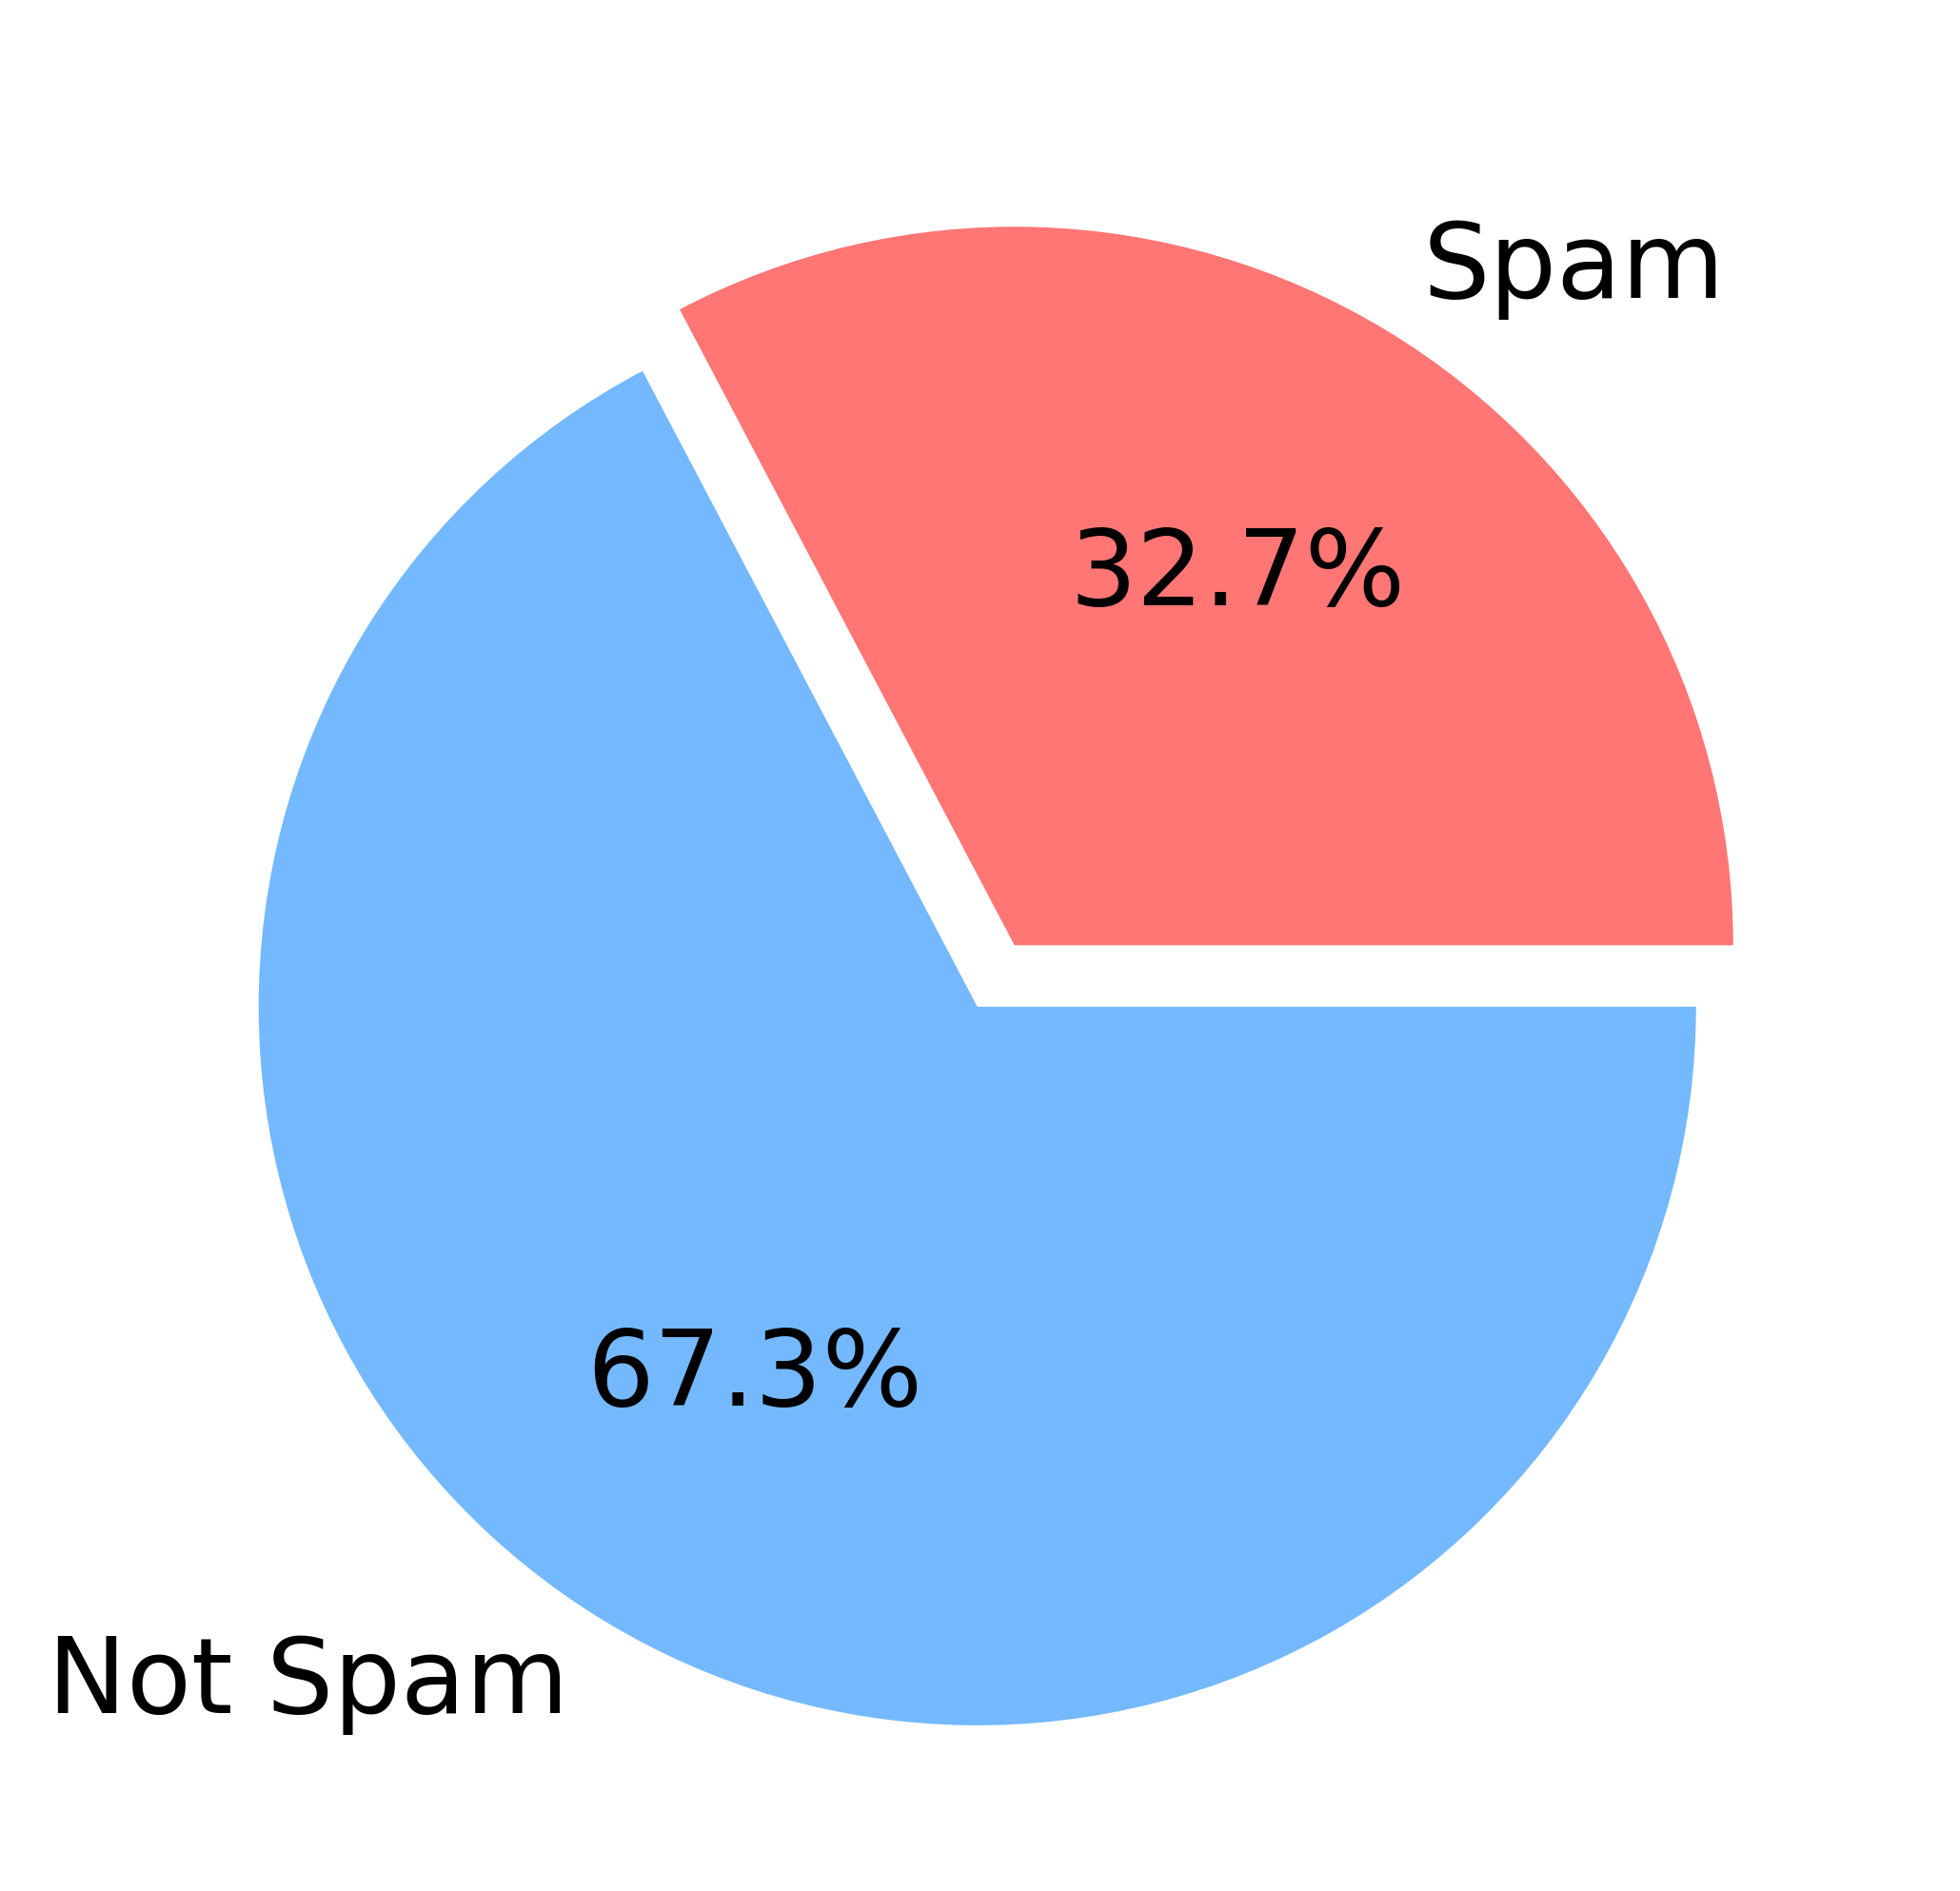

In [36]:
category_names = ['Spam', 'Not Spam']
sizes = [amounts_of_spam, amounts_of_nonspam]

custom_colours = ['#ff7675', '#74b9ff']

plt.figure(figsize = (5,5), dpi = 500)
plt.pie(sizes, labels = category_names, 
        textprops = {'fontsize': 16}, 
        autopct = '%1.1f%%', 
        colors = custom_colours, 
        explode = [0, 0.1])
plt.show()

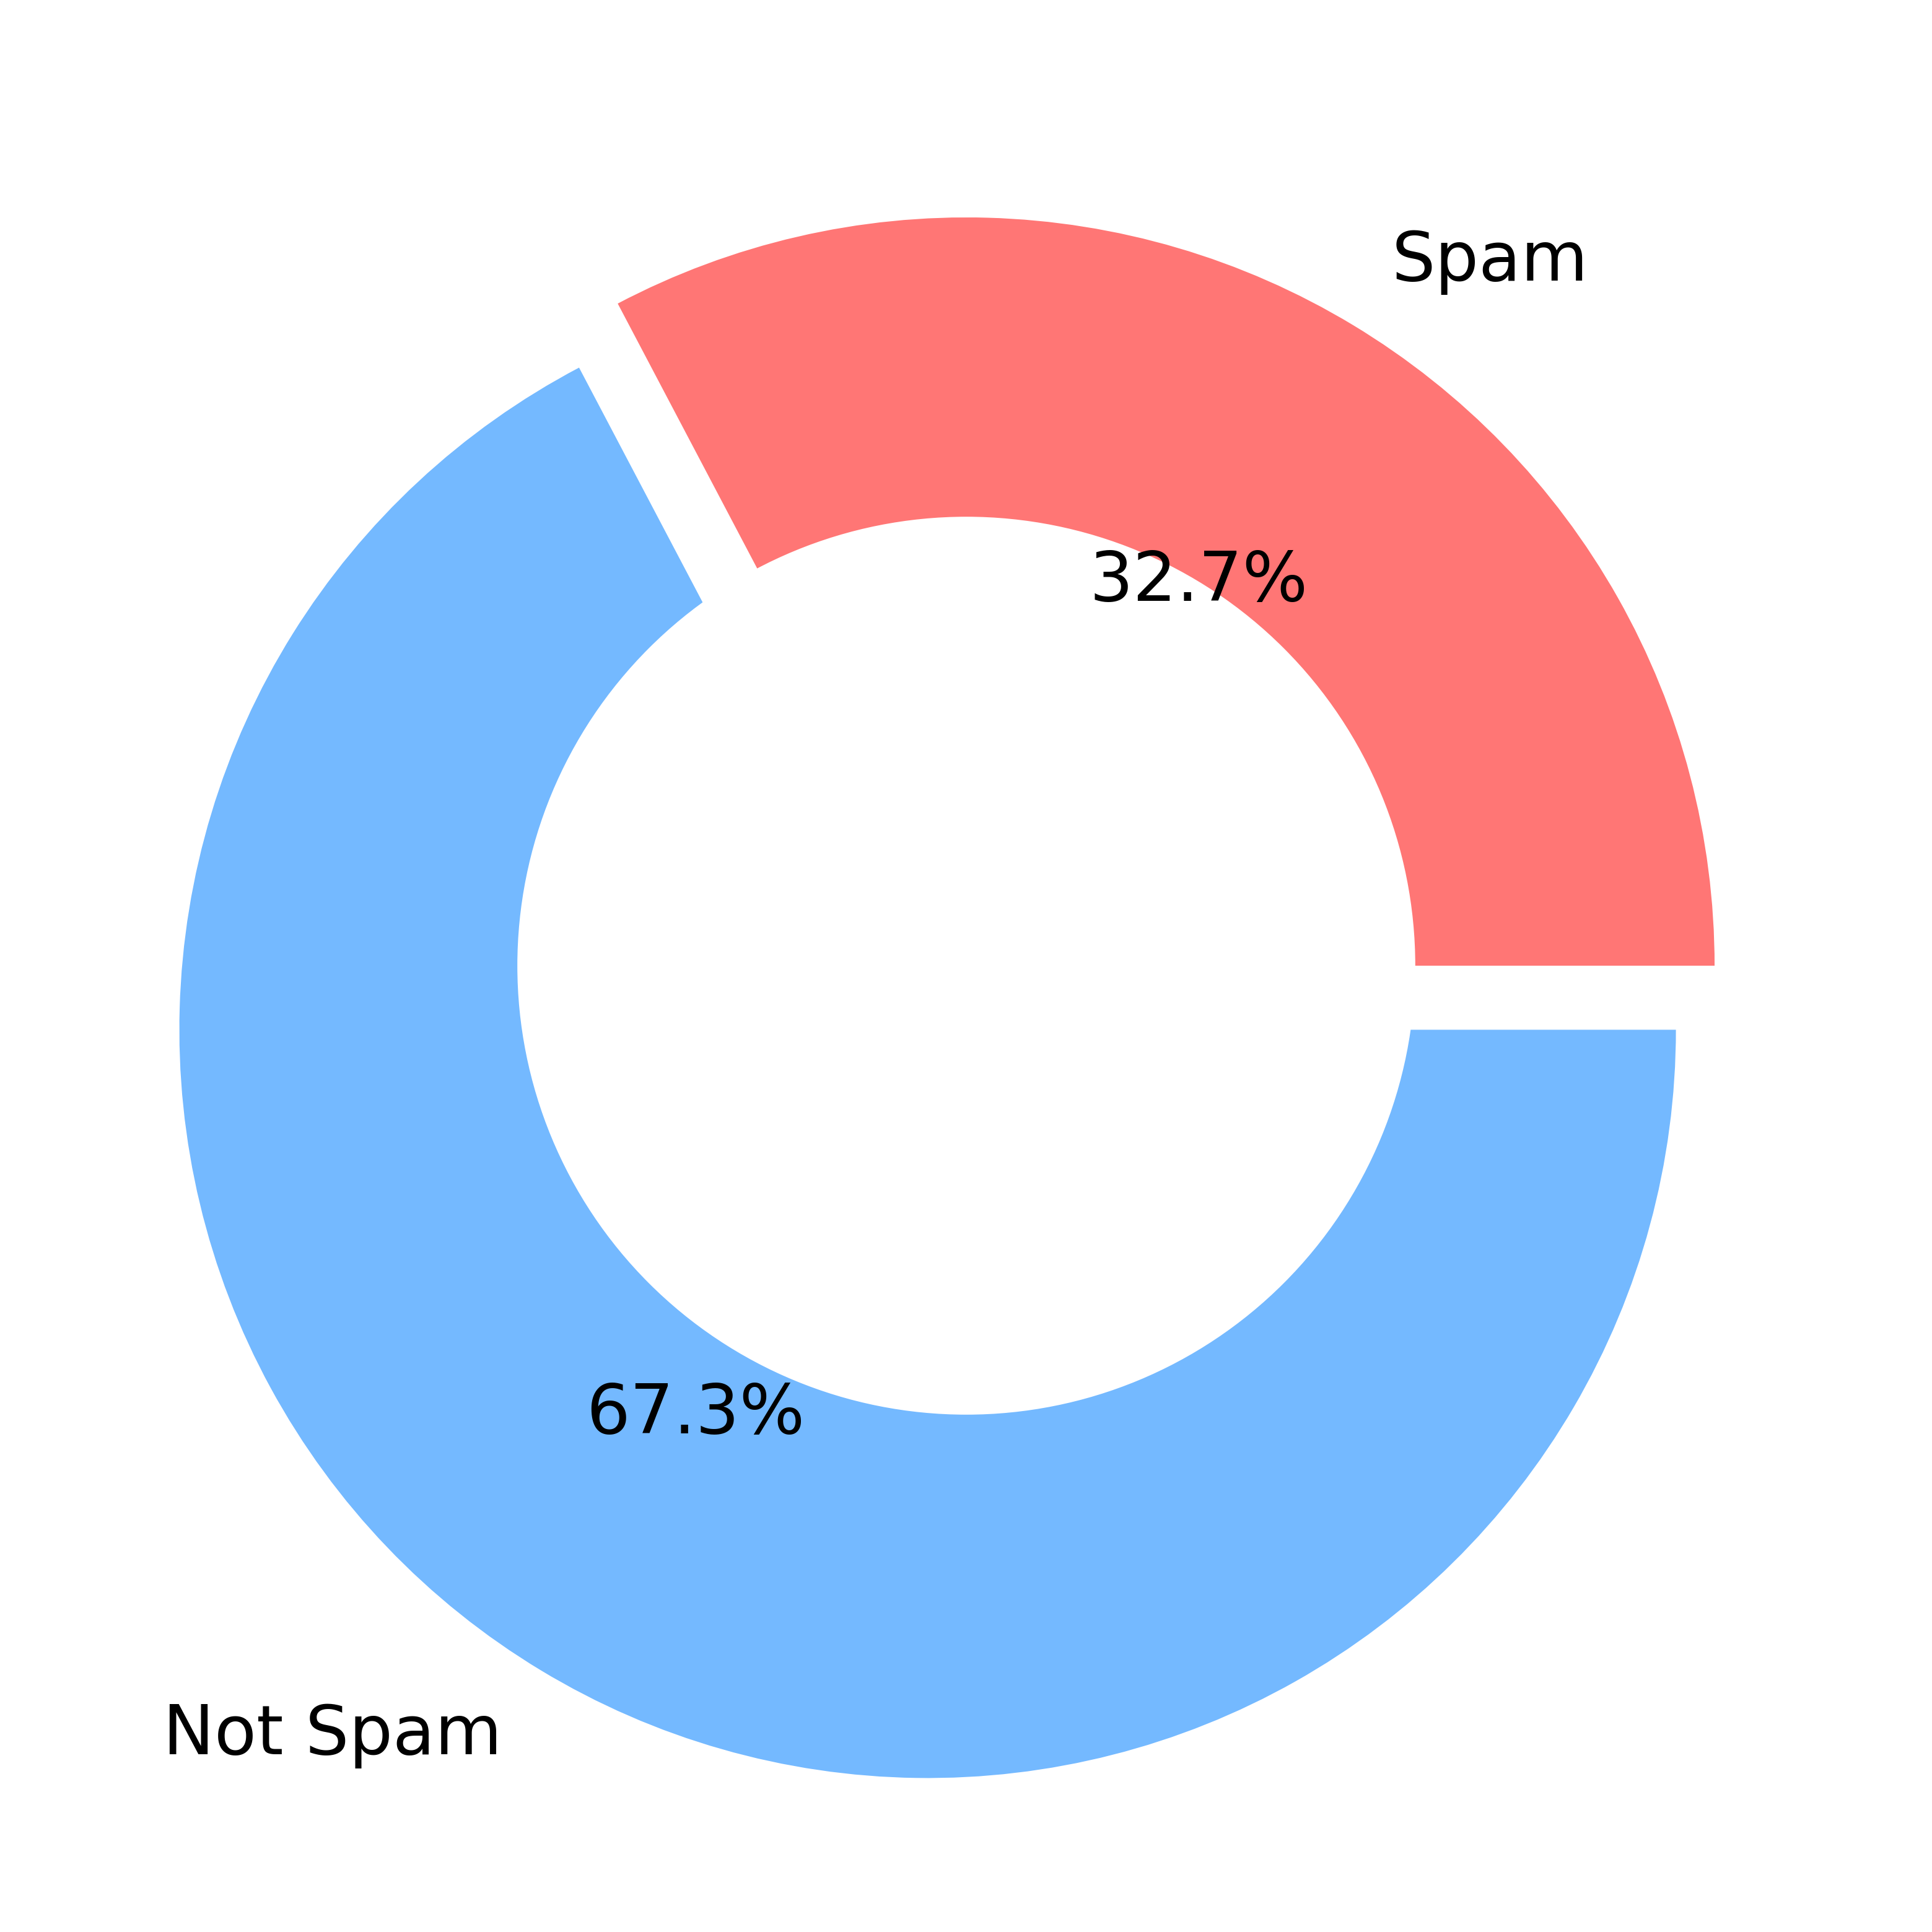

In [37]:
category_names = ['Spam', 'Not Spam']
sizes = [amounts_of_spam, amounts_of_nonspam]

custom_colours = ['#ff7675', '#74b9ff']

plt.figure(figsize = (8,8), dpi = 500)
plt.pie(sizes, labels = category_names, 
        textprops = {'fontsize': 16}, 
        autopct = '%1.1f%%', 
        colors = custom_colours,
       explode = [0, 0.1]) 
#         pctdistance = 0)

# draw circle
centre_circle = plt.Circle((0, 0), radius = 0.6, fc = 'white')
plt.gca().add_artist(centre_circle)

plt.show()

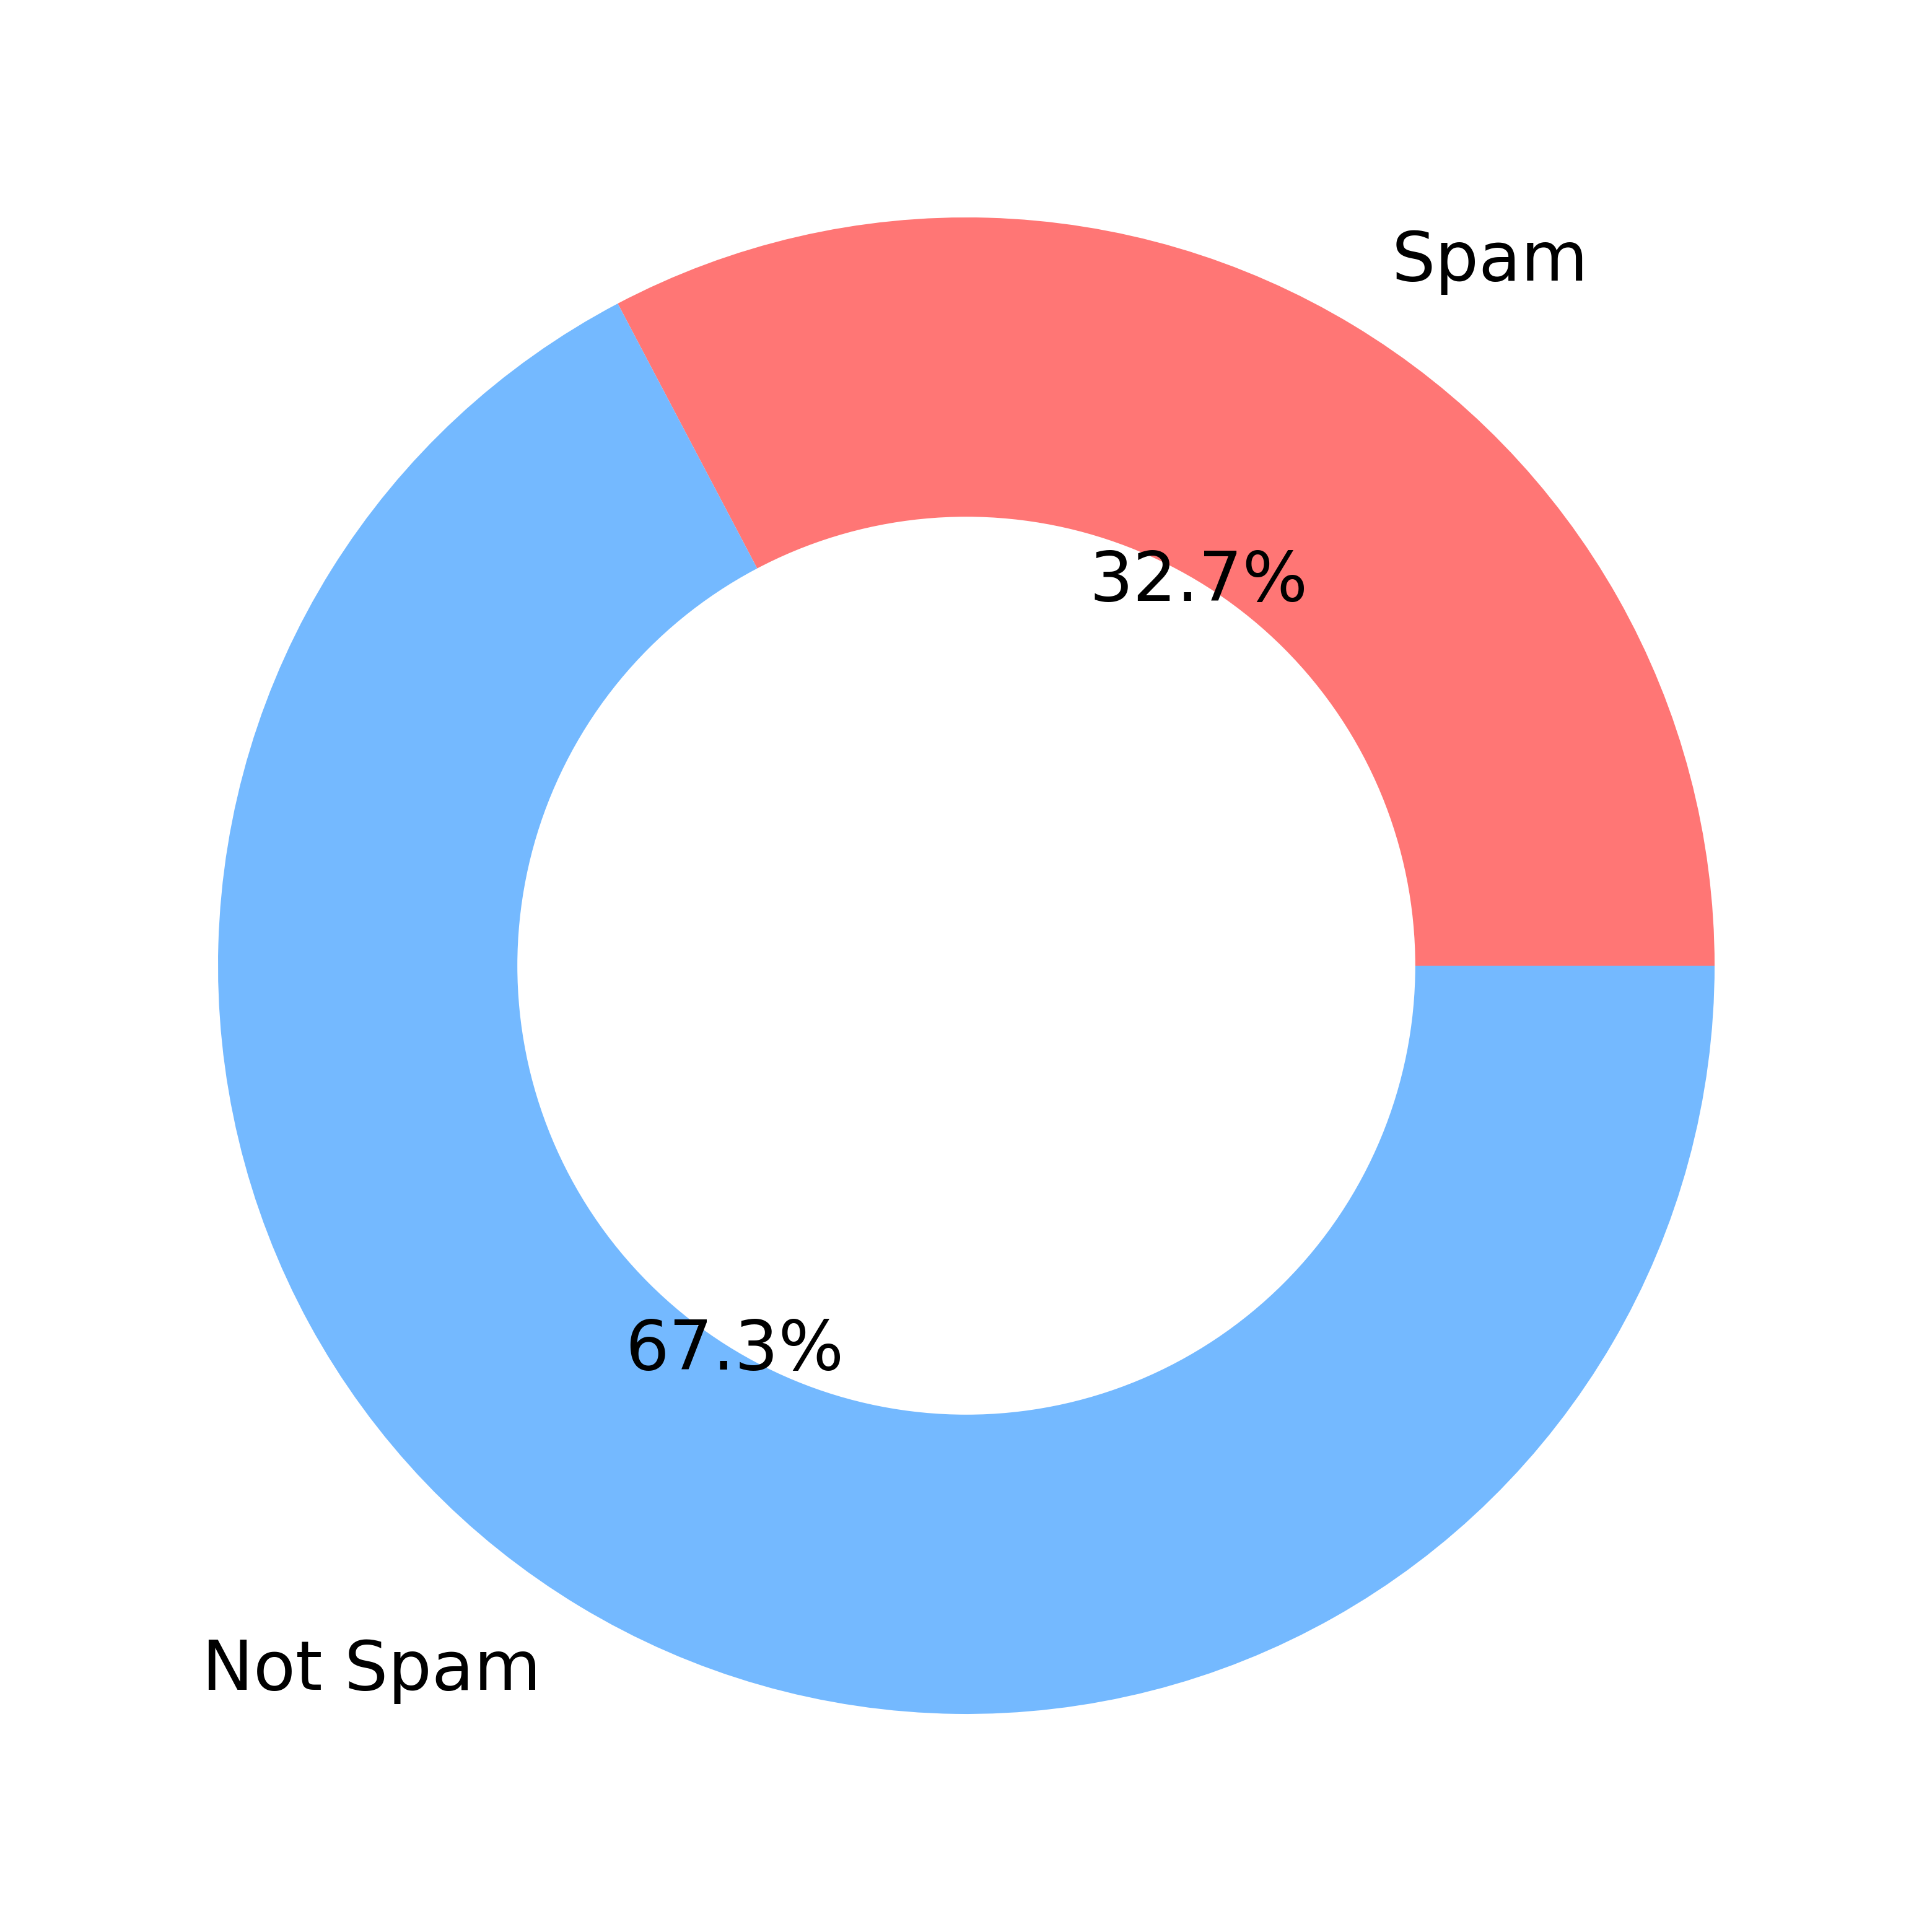

In [38]:
category_names = ['Spam', 'Not Spam']
sizes = [amounts_of_spam, amounts_of_nonspam]

custom_colours = ['#ff7675', '#74b9ff']

plt.figure(figsize = (8,8), dpi = 500)
plt.pie(sizes, labels = category_names, 
        textprops = {'fontsize': 16}, 
        autopct = '%1.1f%%', 
        colors = custom_colours) 
#         pctdistance = 0)

# draw circle
centre_circle = plt.Circle((0, 0), radius = 0.6, fc = 'white')
plt.gca().add_artist(centre_circle)

plt.show()

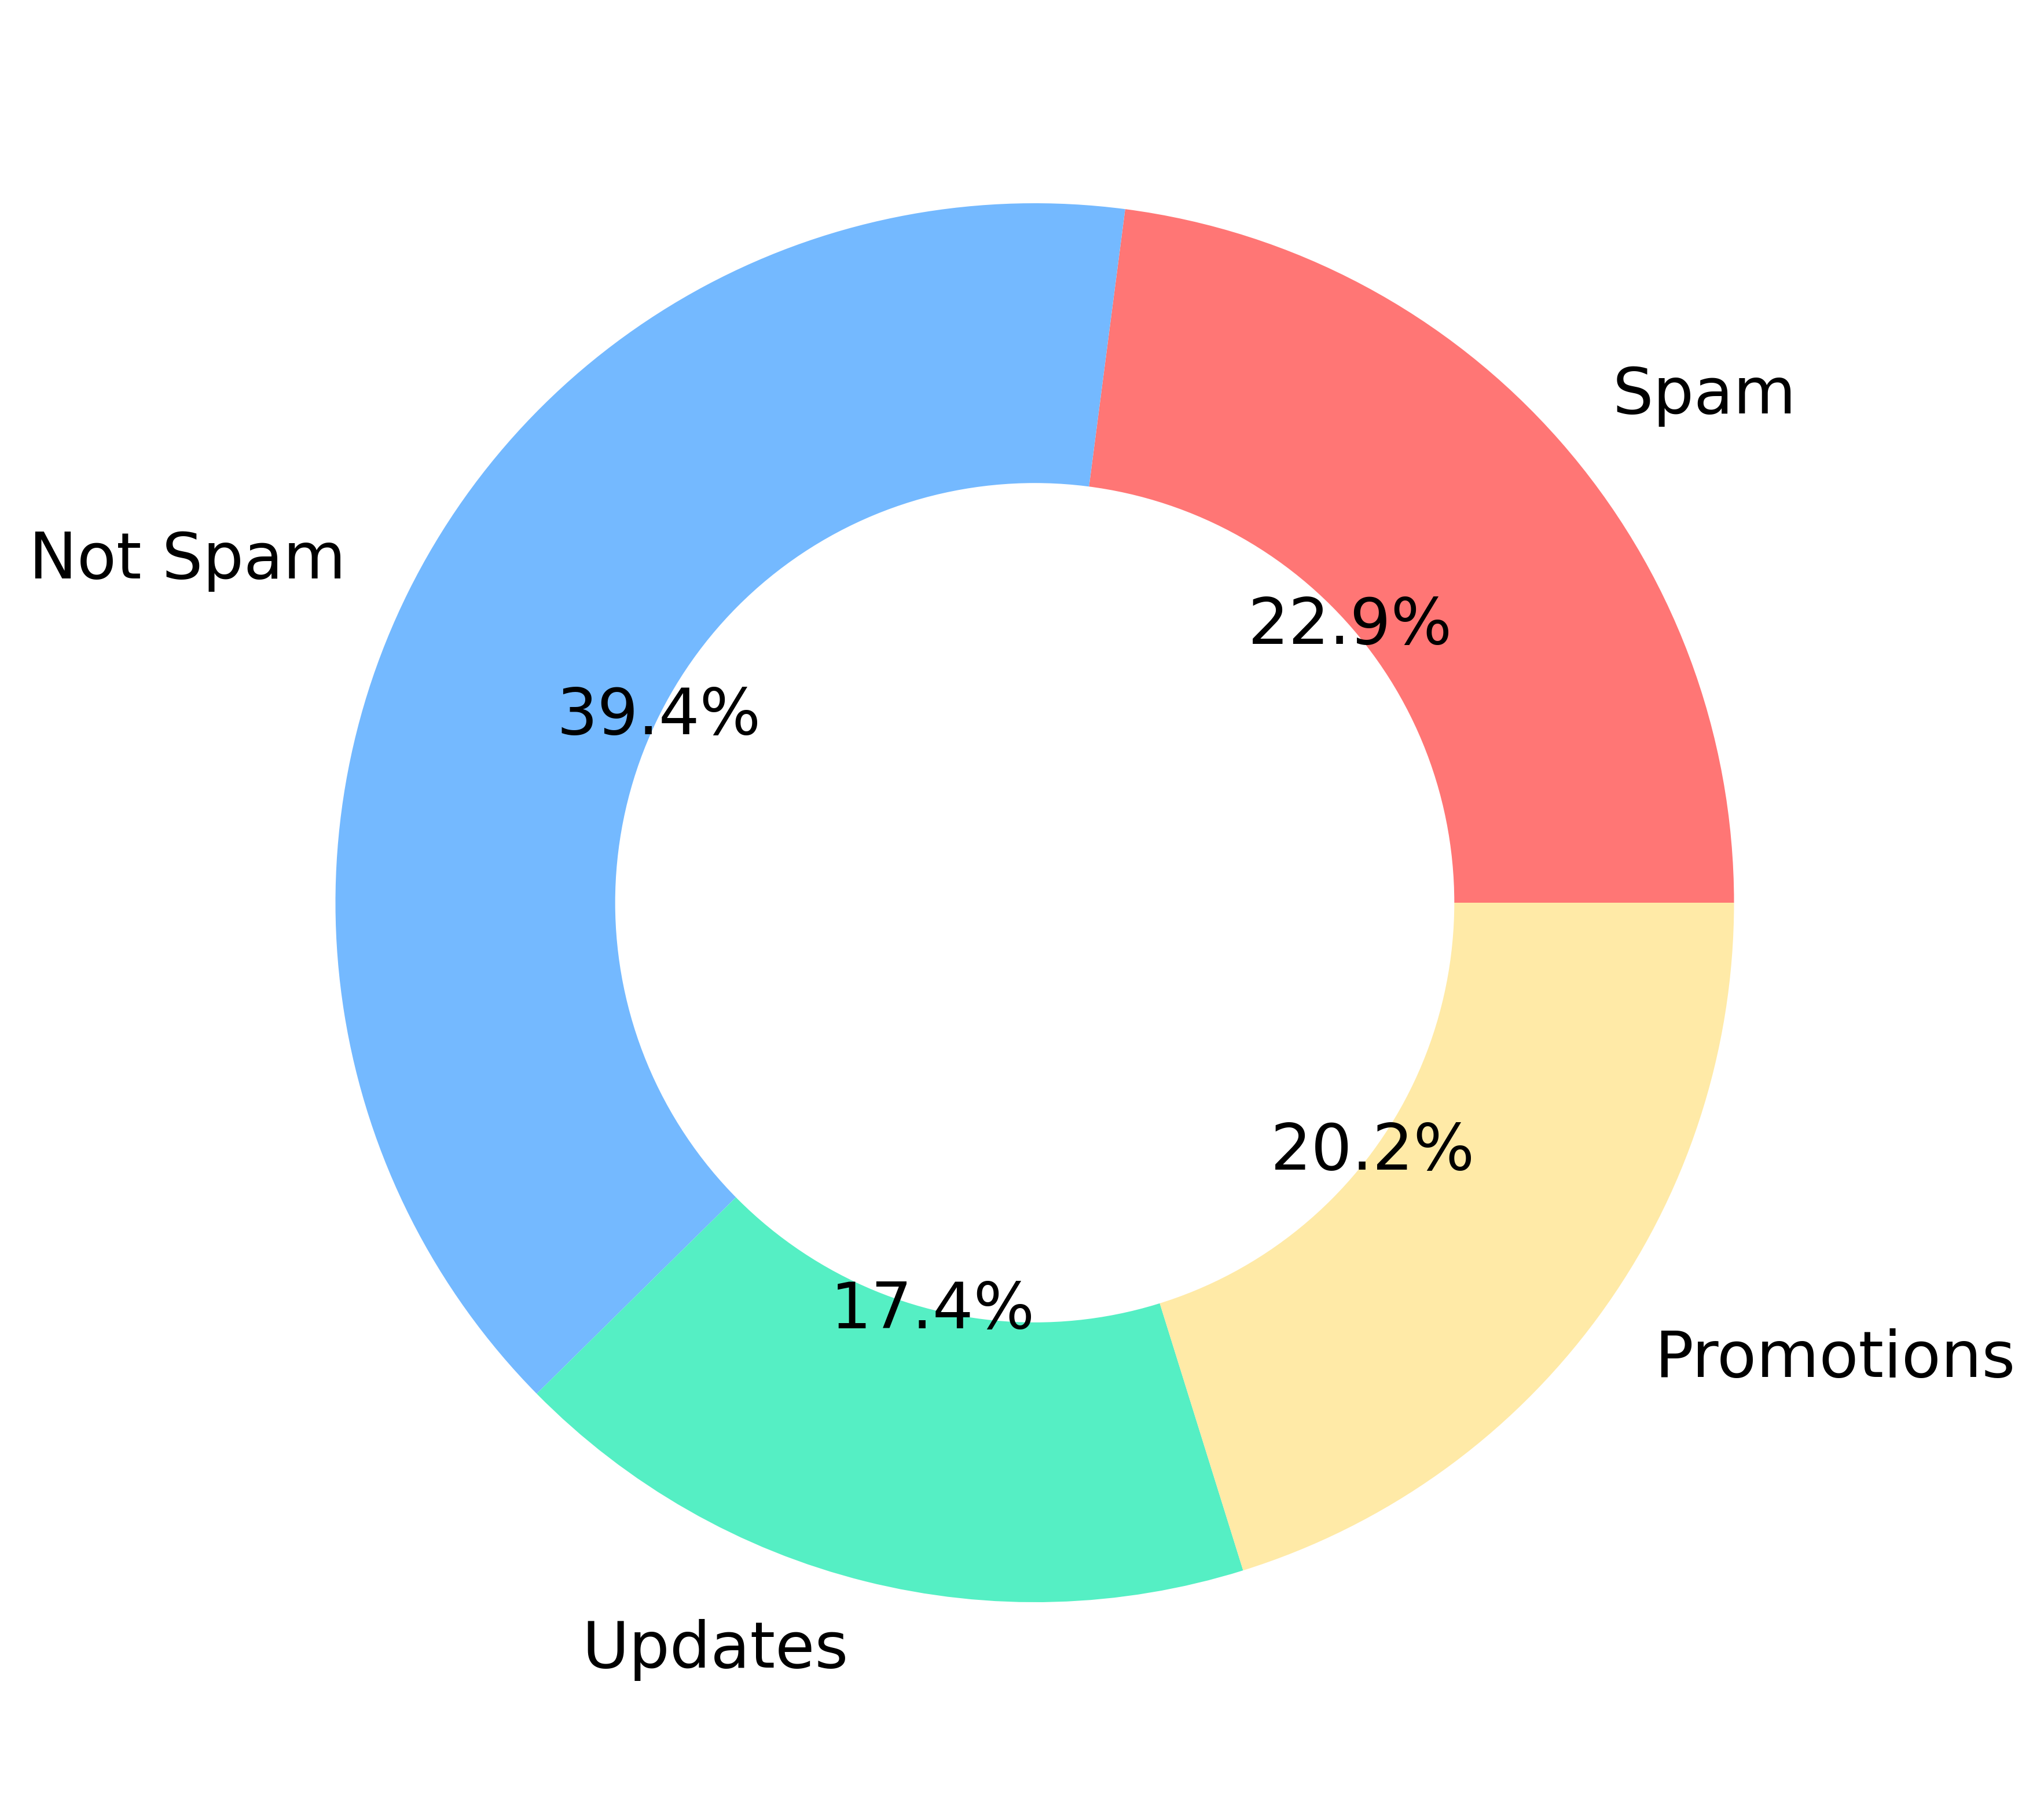

In [39]:
category_names = ['Spam', 'Not Spam', 'Updates', 'Promotions']
sizes = [25, 43, 19, 22]

custom_colours = ['#ff7675', '#74b9ff', '#55efc4', '#ffeaa7']

plt.figure(figsize = (8,8), dpi = 500)
plt.pie(sizes, labels = category_names, 
        textprops = {'fontsize': 16}, 
        autopct = '%1.1f%%', 
        colors = custom_colours) 
#         pctdistance = 0)

# draw circle
centre_circle = plt.Circle((0, 0), radius = 0.6, fc = 'white')
plt.gca().add_artist(centre_circle)

plt.show()

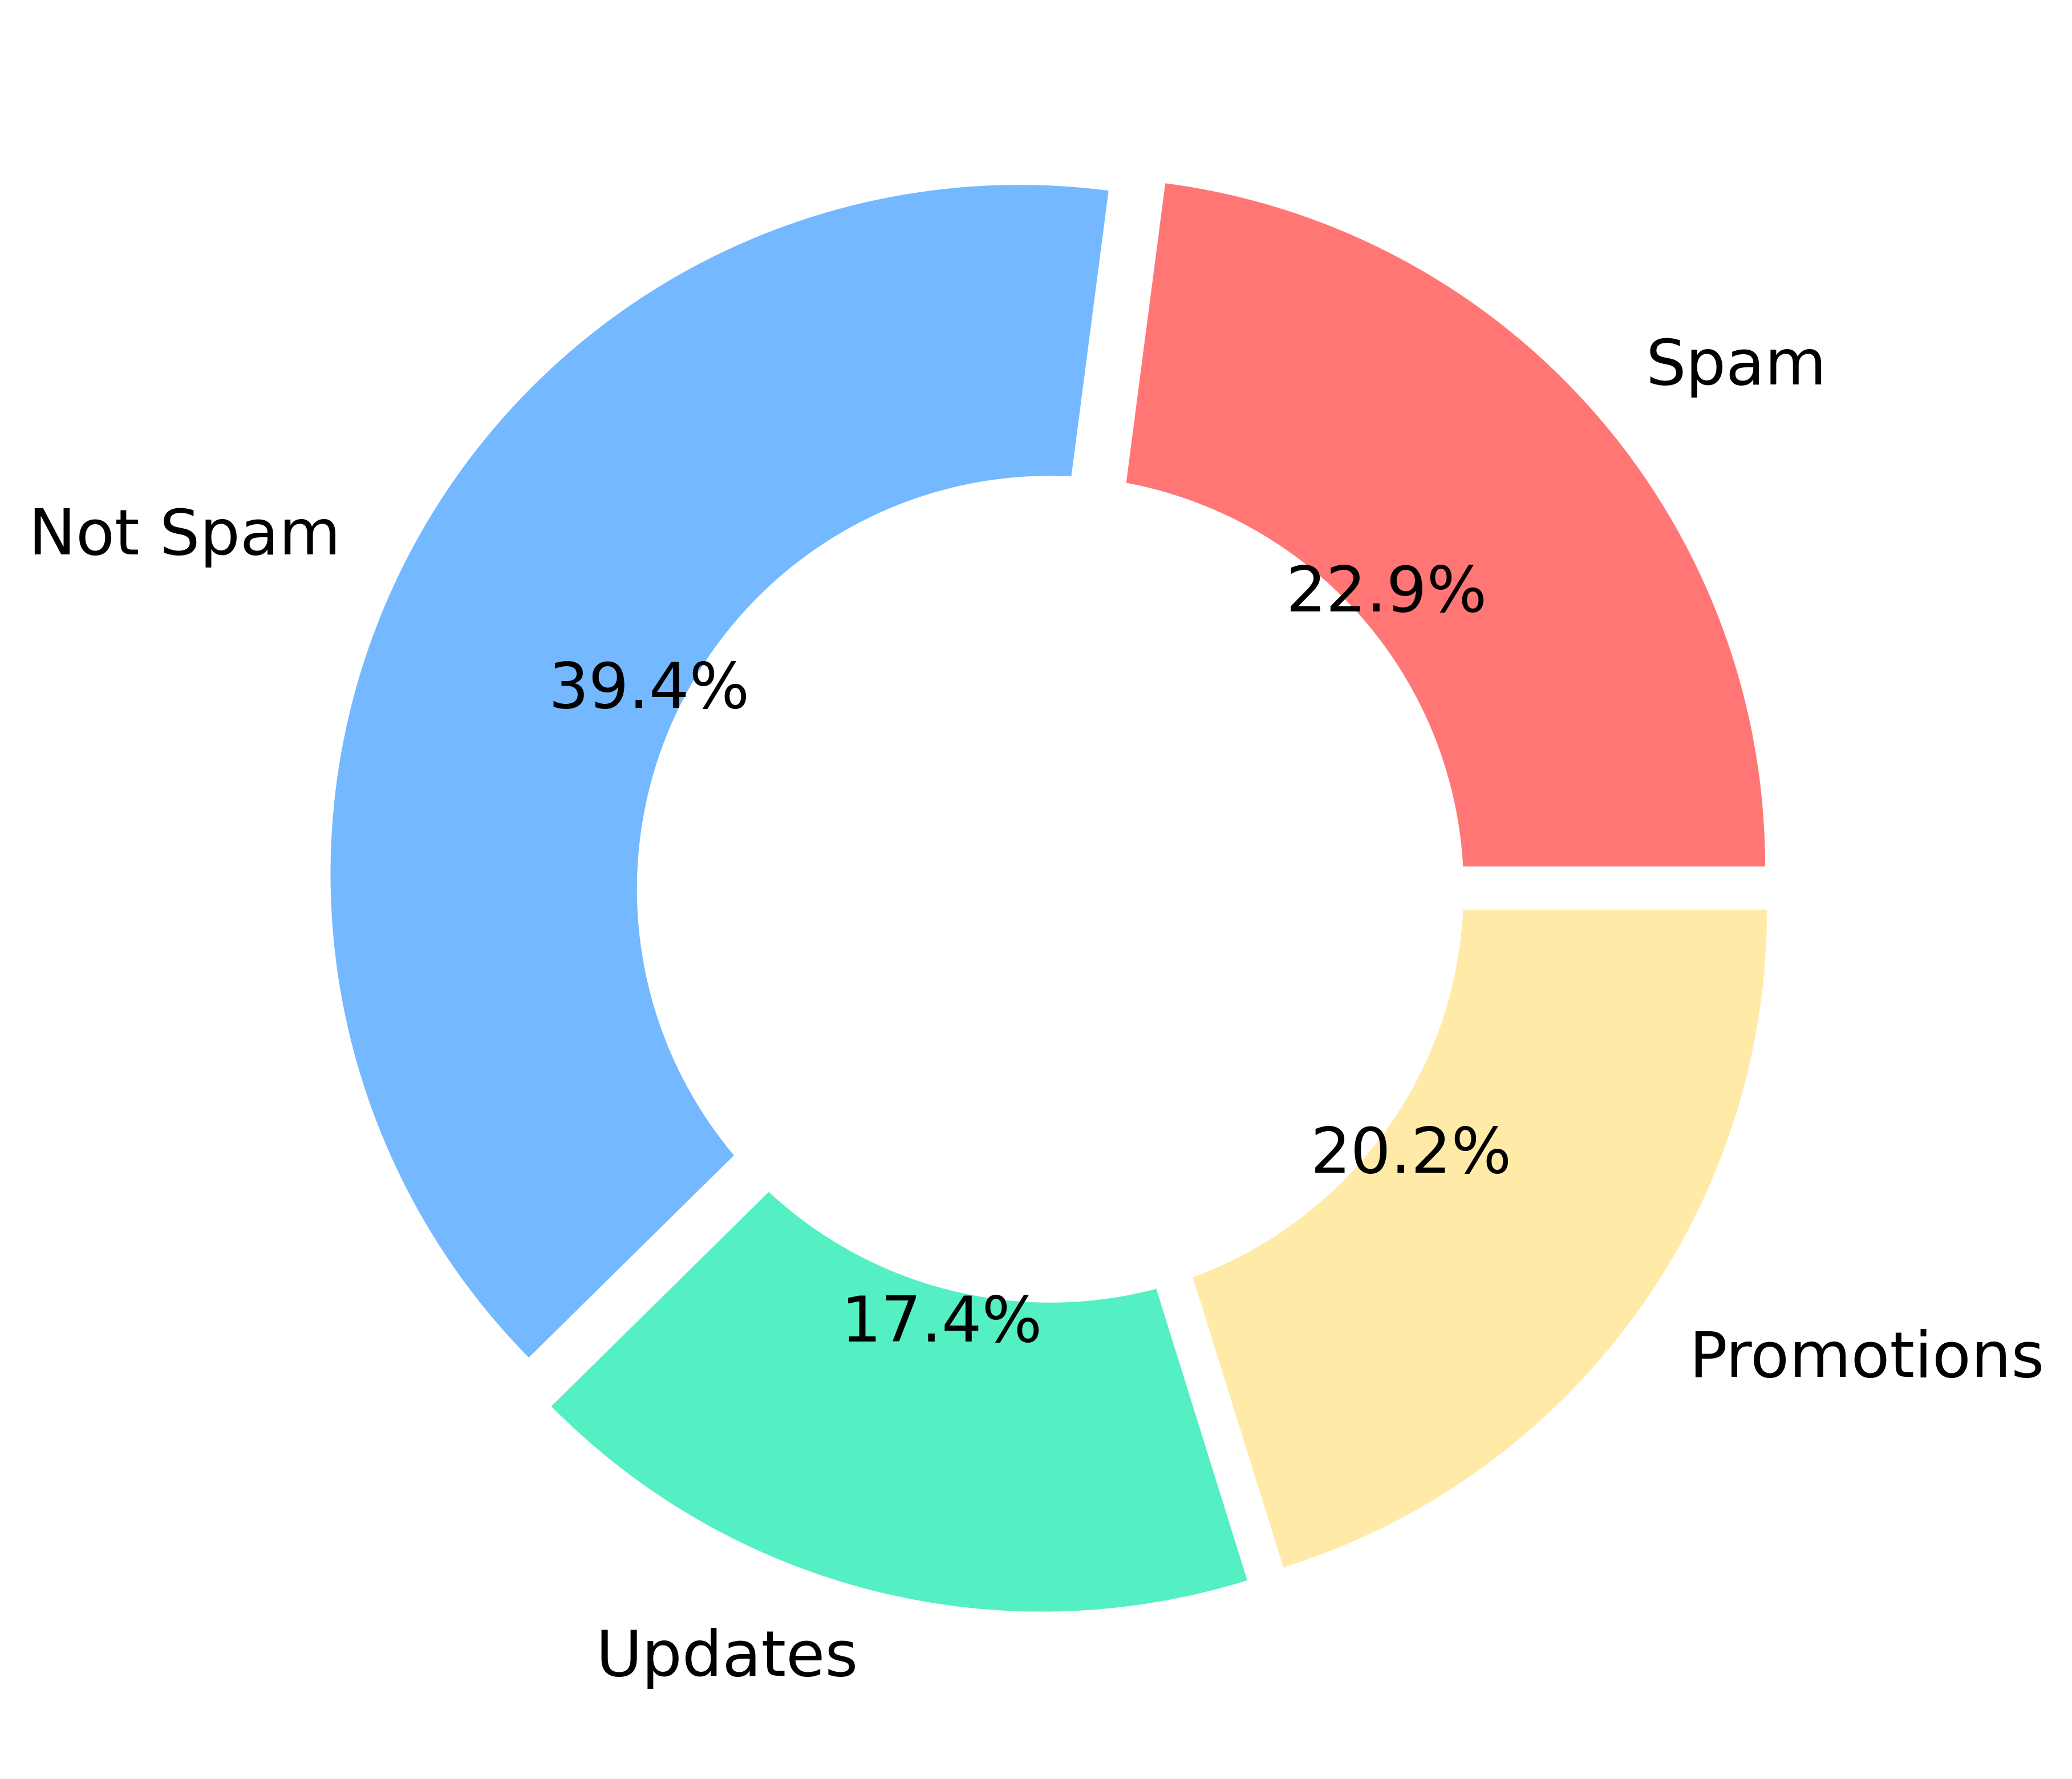

In [40]:
category_names = ['Spam', 'Not Spam', 'Updates', 'Promotions']
sizes = [25, 43, 19, 22]

custom_colours = ['#ff7675', '#74b9ff', '#55efc4', '#ffeaa7']
offset = [0.05, 0.05, 0.05, 0.05]
plt.figure(figsize = (8,8), dpi = 500)
plt.pie(sizes, labels = category_names, 
        textprops = {'fontsize': 16}, 
        autopct = '%1.1f%%', 
        colors = custom_colours, 
        explode = offset) 
#         pctdistance = 0)

# draw circle

centre_circle = plt.Circle((0, 0), radius = 0.6, fc = 'white')
plt.gca().add_artist(centre_circle)

plt.show()

# Natural Language Processing

## Text Pre-processing

### 1. Coverting to lower case
### 2. Tokenising- split individual words in a sentence 
### 3. Removing stop words-very common words in English like 'The' which is there to convey grammar rather than meaning
### 4. Stripping out HTML Tags
### 5. Word Stemming-converting indivual words to their stem word. eg "going" "goes" and "go" share the word stem "go"
### 6. Removing Punctuation

In [41]:
msg = 'All Work And No Play Makes Jack A Dull Boy'
msg.lower()

'all work and no play makes jack a dull boy'

### Download NLTK Resources(Tokenizer & Stopwords)

## Tokenizing ~ Split words in a sentence

In [42]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nyambura\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [43]:
msg = 'All Work And No Play Makes Jack A Dull Boy'
word_tokenize(msg.lower())

['all', 'work', 'and', 'no', 'play', 'makes', 'jack', 'a', 'dull', 'boy']

In [44]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nyambura\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [45]:
nltk.download('gutenberg')
nltk.download('shakespeare')

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\Nyambura\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package shakespeare to
[nltk_data]     C:\Users\Nyambura\AppData\Roaming\nltk_data...
[nltk_data]   Package shakespeare is already up-to-date!


True

## Removing Stop Words ~ Common words in a language 

In [46]:
# The, i, of, a, at, which, at, on, e.t.c

In [47]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [48]:
stop_words = set(stopwords.words('english'))

In [49]:
type(stop_words)

set

In [50]:
if 'hello' not in stop_words:
    print('Nope, not in here')


Nope, not in here


In [51]:
if 'this' in stop_words:
    print('Found it!')

Found it!


In [52]:
msg = 'All Work And No Play Makes Jack A Dull Boy. To be or not to be'
words = word_tokenize(msg.lower())

filtered_words = []
for word in words:
    if word not in stop_words:
        filtered_words.append(word)
print(filtered_words)

['work', 'play', 'makes', 'jack', 'dull', 'boy', '.']


## Word Stem and Stemming 
##### The process of reducing words to their root or base form..i.e goes, going: root=go  making,makes,maker: root=make

In [53]:
msg = 'All Work And No Play Makes Jack A Dull Boy. To be or not to be. Nobody expects the Spanish Inquisition!'
words = word_tokenize(msg.lower())

# stemmer = PorterStemmer()

stemmer = SnowballStemmer('english')

filtered_words = []
for word in words:
    if word not in stop_words:
        stemmed_word = stemmer.stem(word)
        filtered_words.append(stemmed_word)
print(filtered_words)

['work', 'play', 'make', 'jack', 'dull', 'boy', '.', '.', 'nobodi', 'expect', 'spanish', 'inquisit', '!']


 # Removing Punctuation

In [54]:
'p'.isalpha()

True

In [55]:
'?'.isalpha()

False

In [56]:
msg = 'All Work And No Play Makes Jack A Dull Boy. To be or not to be???? Nobody expects the Spanish Inquisition!'
words = word_tokenize(msg.lower())

# stemmer = PorterStemmer()

stemmer = SnowballStemmer('english')
filtered_words = []

for word in words:
    if word not in stop_words and word.isalpha():
        stemmed_word = stemmer.stem(word)
        filtered_words.append(stemmed_word)
print(filtered_words)

['work', 'play', 'make', 'jack', 'dull', 'boy', 'nobodi', 'expect', 'spanish', 'inquisit']


# Removing HTML Tags from emails

In [57]:
soup = BeautifulSoup(data.at[13, 'MESSAGE'], 'html.parser')
print(soup.prettify())



<html>
 <head>
  <title>
   FREE Motorola Cell Phone with $50 Cash Back!
  </title>
  <style>
  </style>
 </head>
 <body bgcolor="#ffffff">
  <table align="center" border="0" cellpadding="0" cellspacing="0" width="450">
   <tbody>
    <tr>
     <td>
      <img height="1" src="images/spacer.gif" width="185"/>
     </td>
     <td>
      <img height="1" src="images/spacer.gif" width="65"/>
     </td>
     <td>
      <img height="1" src="images/spacer.gif" width="50"/>
     </td>
     <td>
      <img height="1" src="images/spacer.gif" width="150"/>
     </td>
    </tr>
    <tr>
     <td colspan="2" rowspan="2">
      <a href="http://theadmanager.com/server/c.asp?ad_key=QBFUIEXORXKL&amp;ext=1">
       <img border="0" height="150" src="http://168.143.181.42/htmlemails/images/T193no_option_01.gif" width="250"/>
      </a>
     </td>
     <td rowspan="2">
      <a href="http://theadmanager.com/server/c.asp?ad_key=QBFUIEXORXKL&amp;ext=1">
       <img border="0" height="150" src="http://168.143.

In [58]:
soup.get_text()

'FREE Motorola Cell Phone with $50 Cash Back!\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n*Free phone\n\n      offer subject to VoiceStream Wireless credit approval. Must activate a new\n\n      line of service to receive a free phone. A one-time activation fee of $25\n\n      applies to all new activations. Coverage not available in all areas. Offer\n\n      fulfilled by SimplyWireless.com, a VoiceStream authorized dealer. See site\n\n      for additional offer details.\n\n      **$50 mail-in rebate is available for new VoiceStream service plans\n\n      $29.99 and greater. Rebate ends\n\n8/31/02.\n\n\n\n\nYou are receiving this mailing because you are a\n\nmember of SendGreatOffers.com and subscribed as:JM@NETNOTEINC.COM\n\nTo unsubscribe \nClick Here\n\n(http://admanmail.com/subscription.asp?em=JM@NETNOTEINC.COM&l=SGO)\n\nor reply to this email with REMOVE in the subject line - you must\n\nalso include the body of this message to be unsubscribed. Any corresp

## Functions for email processing

In [59]:
def clean_message(message, stemmer = PorterStemmer(), stop_words = set(stopwords.words('english'))):
    
    
    #Converts to lower case and splits up the words              
    words = word_tokenize(message.lower())
    
    filtered_words = []
    
    for word in words:
        #Removes the stop words and punctuation
        if word not in stop_words and word.isalpha():
            filtered_words.append(stemmer.stem(word))
#             filtered_words.append((word))
    
    return filtered_words

In [60]:
clean_message(email_body)

['dear',
 'mr',
 'still',
 'good',
 'tide',
 'staff',
 'festiv',
 'season',
 'ahead',
 'christma',
 'crux',
 'fulli',
 'qualifi',
 'santa',
 'clau',
 'wonder',
 'whether',
 'might',
 'consid',
 'run',
 'santa',
 'grotto',
 'store',
 'wait',
 'probabl',
 'think',
 'make',
 'special',
 'well',
 'first',
 'made',
 'sever',
 'chang',
 'characteris',
 'father',
 'christma',
 'rather',
 'greet',
 'children',
 'shout',
 'ho',
 'ho',
 'ho',
 'prefer',
 'whisper',
 'phrase',
 'depend',
 'unfathom',
 'cruel',
 'world',
 'live',
 'addit',
 'gift',
 'rang',
 'felt',
 'hoop',
 'holder',
 'note',
 'also',
 'enclos',
 'sketch',
 'radic',
 'redesign',
 'santa',
 'outfit',
 'renam',
 'charact',
 'lord',
 'buckl',
 'would',
 'interest',
 'employ',
 'promis',
 'never',
 'let',
 'look',
 'forward',
 'hear',
 'best',
 'wish',
 'robin',
 'cooper',
 'excerpt',
 'book',
 'timewast',
 'letter',
 'robin',
 'cooper']

In [61]:
def clean_message_no_html(message, stemmer = PorterStemmer(), stop_words = set(stopwords.words('english'))):
    
    #Remove HTML Tags
    soup = BeautifulSoup(message, 'html.parser')
    cleaned_text = soup.get_text()
    
    #Converts to lower case and splits up the words              
    words = word_tokenize(cleaned_text.lower())
    
    filtered_words = []
    
    for word in words:
        #Removes the stop words and punctuation
        if word not in stop_words and word.isalpha():
            filtered_words.append(stemmer.stem(word))
    
    
    return filtered_words

In [62]:
clean_message_no_html(data.at[13, 'MESSAGE'])

['free',
 'motorola',
 'cell',
 'phone',
 'cash',
 'back',
 'free',
 'phone',
 'offer',
 'subject',
 'voicestream',
 'wireless',
 'credit',
 'approv',
 'must',
 'activ',
 'new',
 'line',
 'servic',
 'receiv',
 'free',
 'phone',
 'activ',
 'fee',
 'appli',
 'new',
 'activ',
 'coverag',
 'avail',
 'area',
 'offer',
 'fulfil',
 'voicestream',
 'author',
 'dealer',
 'see',
 'site',
 'addit',
 'offer',
 'detail',
 'rebat',
 'avail',
 'new',
 'voicestream',
 'servic',
 'plan',
 'greater',
 'rebat',
 'end',
 'receiv',
 'mail',
 'member',
 'subscrib',
 'jm',
 'unsubscrib',
 'click',
 'http',
 'repli',
 'email',
 'remov',
 'subject',
 'line',
 'must',
 'also',
 'includ',
 'bodi',
 'messag',
 'unsubscrib',
 'correspond',
 'direct',
 'compani',
 'ad',
 'em',
 'jm']

# Apply Cleaning and Tokenisation to all messages

### Slicing DataFrames and Series & Creating subsets

In [63]:
data.iat[2,2]

'00003.2ee33bc6eacdb11f38d052c44819ba6c'

In [64]:
data.iloc[5:11]

MESSAGE  CATEGORY  \
DOC_ID                                                                
5       A POWERHOUSE GIFTING PROGRAM You Don't Want To...         1   
6       Help wanted.  We are a 14 year old fortune 500...         1   
7       <html>\n\n<head>\n\n<title>ReliaQuote - Save U...         1   
8       TIRED OF THE BULL OUT THERE?\n\nWant To Stop L...         1   
9       Dear ricardo1 ,\n\n\n\n<html>\n\n<body>\n\n<ce...         1   
10      Cellular Phone Accessories All At Below Wholes...         1   

                                     FILE_NAME  
DOC_ID                                          
5       00006.5ab5620d3d7c6c0db76234556a16f6c1  
6       00007.d8521faf753ff9ee989122f6816f87d7  
7       00008.dfd941deb10f5eed78b1594b131c9266  
8       00009.027bf6e0b0c4ab34db3ce0ea4bf2edab  
9       00010.445affef4c70feec58f9198cfbc22997  
10      00011.61816b9ad167657773a427d890d0468e

In [65]:
data.MESSAGE.iloc[5:11]

DOC_ID
5     A POWERHOUSE GIFTING PROGRAM You Don't Want To...
6     Help wanted.  We are a 14 year old fortune 500...
7     <html>\n\n<head>\n\n<title>ReliaQuote - Save U...
8     TIRED OF THE BULL OUT THERE?\n\nWant To Stop L...
9     Dear ricardo1 ,\n\n\n\n<html>\n\n<body>\n\n<ce...
10    Cellular Phone Accessories All At Below Wholes...
Name: MESSAGE, dtype: object

In [66]:
first_emails = data.MESSAGE.iloc[0:3]

nested_list = first_emails.apply(clean_message)

In [67]:
type(first_emails.apply(clean_message))

pandas.core.series.Series

In [68]:
# flat_list = []
# for sublist in nested_list:
#     for item in sublist:
#         flat_list.append(item)
flat_list = [item for sublist in nested_list for item in sublist]
len(flat_list)

321

In [69]:
%%time

# use apply() on all the messages in the dataframe
nested_list = data.MESSAGE.apply(clean_message_no_html)


Wall time: 2min 27s


In [70]:
nested_list.head()

DOC_ID
0    [save, life, insur, spend, life, quot, save, g...
1    [fight, risk, cancer, http, slim, guarante, lo...
2    [fight, risk, cancer, http, slim, guarante, lo...
3    [adult, club, offer, free, membership, instant...
4    [thought, might, like, slim, guarante, lose, l...
Name: MESSAGE, dtype: object

### Using Logic to Slice DataFrames

In [71]:
data[data.CATEGORY == 1]

MESSAGE  CATEGORY  \
DOC_ID                                                                
0       <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Tr...         1   
1       1) Fight The Risk of Cancer!\n\nhttp://www.adc...         1   
2       1) Fight The Risk of Cancer!\n\nhttp://www.adc...         1   
3       ##############################################...         1   
4       I thought you might like these:\n\n1) Slim Dow...         1   
...                                                   ...       ...   
1891    <html>\n\n<head>\n\n<meta http-equiv="content-...         1   
1892    This is a multi-part message in MIME format.\n...         1   
1893    Dear Subscriber,\n\n\n\nIf I could show you a ...         1   
1894    ****Mid-Summer Customer Appreciation SALE!****...         1   
1895    ATTN:SIR/MADAN      \n\n\n\n                  ...         1   

                                     FILE_NAME  
DOC_ID                                          
0       00001.7848dde101aa985090474a91ec93fcf0  
1       00002.d94f1b97e48ed3b553b3508d116e6a09  
2       00003.2ee33bc6eacdb11f38d052c44819ba6c  
3       00004.eac8de8d759b7e74154f142194282724  
4       00005.57696a39d7d84318ce497886896bf90d  
...                                        ...  
1891    01396.e80a10644810bc2ae3c1b58c5fd38dfa  
1892    01397.f75f0dd0dd923faefa3e9cc5ecb8c906  
1893    01398.8ca7045aae4184d56e8509dc5ad6d979  
1894    01399.2319643317e2c5193d574e40a71809c2  
1895    01400.b444b69845db2fa0a4693ca04e6ac5c5  

[1896 rows x 3 columns]

In [72]:
data[data.CATEGORY == 1].shape

(1896, 3)

In [73]:
data[data.CATEGORY == 1].head()

MESSAGE  CATEGORY  \
DOC_ID                                                                
0       <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Tr...         1   
1       1) Fight The Risk of Cancer!\n\nhttp://www.adc...         1   
2       1) Fight The Risk of Cancer!\n\nhttp://www.adc...         1   
3       ##############################################...         1   
4       I thought you might like these:\n\n1) Slim Dow...         1   

                                     FILE_NAME  
DOC_ID                                          
0       00001.7848dde101aa985090474a91ec93fcf0  
1       00002.d94f1b97e48ed3b553b3508d116e6a09  
2       00003.2ee33bc6eacdb11f38d052c44819ba6c  
3       00004.eac8de8d759b7e74154f142194282724  
4       00005.57696a39d7d84318ce497886896bf90d

In [74]:
data[data.CATEGORY == 1].tail()

MESSAGE  CATEGORY  \
DOC_ID                                                                
1891    <html>\n\n<head>\n\n<meta http-equiv="content-...         1   
1892    This is a multi-part message in MIME format.\n...         1   
1893    Dear Subscriber,\n\n\n\nIf I could show you a ...         1   
1894    ****Mid-Summer Customer Appreciation SALE!****...         1   
1895    ATTN:SIR/MADAN      \n\n\n\n                  ...         1   

                                     FILE_NAME  
DOC_ID                                          
1891    01396.e80a10644810bc2ae3c1b58c5fd38dfa  
1892    01397.f75f0dd0dd923faefa3e9cc5ecb8c906  
1893    01398.8ca7045aae4184d56e8509dc5ad6d979  
1894    01399.2319643317e2c5193d574e40a71809c2  
1895    01400.b444b69845db2fa0a4693ca04e6ac5c5

In [75]:
doc_ids_spam = data[data.CATEGORY == 1].index
doc_ids_no_spam = data[data.CATEGORY == 0].index

In [76]:
doc_ids_no_spam

Int64Index([1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905,
            ...
            5786, 5787, 5788, 5789, 5790, 5791, 5792, 5793, 5794, 5795],
           dtype='int64', name='DOC_ID', length=3900)

### Subsetting a Series with an Index

In [77]:
type(doc_ids_no_spam)

pandas.core.indexes.numeric.Int64Index

In [78]:
type(nested_list)

pandas.core.series.Series

In [79]:
 nested_list_no_spam = nested_list.loc[doc_ids_no_spam]

In [80]:
nested_list_no_spam.shape

(3900,)

In [81]:
nested_list_no_spam.tail()

DOC_ID
5791    [http, bizarr, collect, stuf, anim, could, fet...
5792    [care, use, one, also, realli, cute, thing, ja...
5793    [sm, skip, montanaro, write, jeremi, put, anot...
5794    [mark, hammond, like, given, zodb, sound, attr...
5795    [hi, probabl, use, whatsoev, also, problem, re...
Name: MESSAGE, dtype: object

In [82]:
nested_list_spam = nested_list.loc[doc_ids_spam]

In [83]:
nested_list_spam.shape

(1896,)

In [84]:
nested_list_spam.tail()

DOC_ID
1891    [want, boss, train, home, studi, thousand, peo...
1892    [messag, mime, format, prefer, doctor, order, ...
1893    [dear, subscrib, could, show, way, get, visito...
1894    [custom, appreci, sale, express, appreci, loya...
1895    [attn, strictli, confidenti, pleas, introduc, ...
Name: MESSAGE, dtype: object

In [85]:
# Challenge: Use python list comprehension and then find the total number of
#  words in our cleaned dataset of spam email bodies. Also find the total number of
#  words in normal emails in the dataset. Then find the 10 most common words used in 
#  spam. Also, find the 10 most common words used in non-spam messages

In [86]:
flat_list_no_spam = [item for sublist in nested_list_no_spam for item in sublist]
normal_words = pd.Series(flat_list_no_spam)

normal_words.shape[0] # Total number of words in non spam messages

442061

In [87]:
# Unique Words
flat_list_no_spam = [item for sublist in nested_list_no_spam for item in sublist]
normal_words = pd.Series(flat_list_no_spam).value_counts()

normal_words.shape[0] # Total number of unique words in non spam messages

20815

In [88]:
# 10 Most Common Words
normal_words[:10]

http      7563
use       3633
list      2880
one       2373
get       2286
mail      2255
would     2003
like      1931
messag    1849
work      1800
dtype: int64

In [89]:
flat_list_spam = [item for sublist in nested_list_spam for item in sublist]
spammy_words = pd.Series(flat_list_spam)

spammy_words.shape[0] # Total number of words in spam messages

317499

In [90]:
# Unique Spam Words
flat_list_spam = [item for sublist in nested_list_spam for item in sublist]
spammy_words = pd.Series(flat_list_spam).value_counts()

spammy_words.shape[0] # Total number of unique words in non spam messages

13242

In [91]:
# 10 Most Common Words in spam Messages
spammy_words[:10]

http      3097
email     3090
free      2585
click     2058
receiv    1989
list      1971
get       1914
pleas     1852
busi      1792
order     1746
dtype: int64

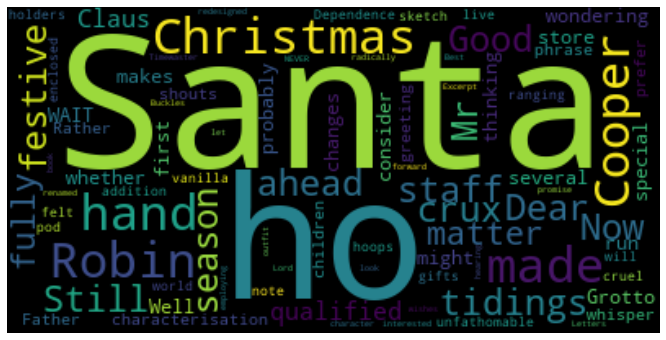

In [92]:
word_cloud = WordCloud().generate(email_body)
plt.figure(figsize = (12,6))
plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [93]:
example_corpus = nltk.corpus.gutenberg.words('melville-moby_dick.txt')
len(example_corpus)

260819

In [94]:
type(example_corpus)

nltk.corpus.reader.util.StreamBackedCorpusView

In [95]:
example_corpus

['[', 'Moby', 'Dick', 'by', 'Herman', 'Melville', ...]

In [96]:
word_list = [''.join(word) for word in example_corpus]
novel_as_string = ''.join(word_list)
novel_as_string

'[MobyDickbyHermanMelville1851]ETYMOLOGY.(SuppliedbyaLateConsumptiveUshertoaGrammarSchool)ThepaleUsher--threadbareincoat,heart,body,andbrain;Iseehimnow.Hewaseverdustinghisoldlexiconsandgrammars,withaqueerhandkerchief,mockinglyembellishedwithallthegayflagsofalltheknownnationsoftheworld.Helovedtodusthisoldgrammars;itsomehowmildlyremindedhimofhismortality."Whileyoutakeinhandtoschoolothers,andtoteachthembywhatnameawhale-fishistobecalledinourtongueleavingout,throughignorance,theletterH,whichalmostalonemakeththesignificationoftheword,youdeliverthatwhichisnottrue."--HACKLUYT"WHALE....Sw.andDan.HVAL.Thisanimalisnamedfromroundnessorrolling;forinDan.HVALTisarchedorvaulted."--WEBSTER\'SDICTIONARY"WHALE....ItismoreimmediatelyfromtheDut.andGer.WALLEN;A.S.WALW-IAN,toroll,towallow."--RICHARDSON\'SDICTIONARYKETOS,GREEK.CETUS,LATIN.WHOEL,ANGLO-SAXON.HVALT,DANISH.WAL,DUTCH.HWAL,SWEDISH.WHALE,ICELANDIC.WHALE,ENGLISH.BALEINE,FRENCH.BALLENA,SPANISH.PEKEE-NUEE-NUEE,FEGEE.PEKEE-NUEE-NUEE,ERROMANGOAN.EXTRACTS

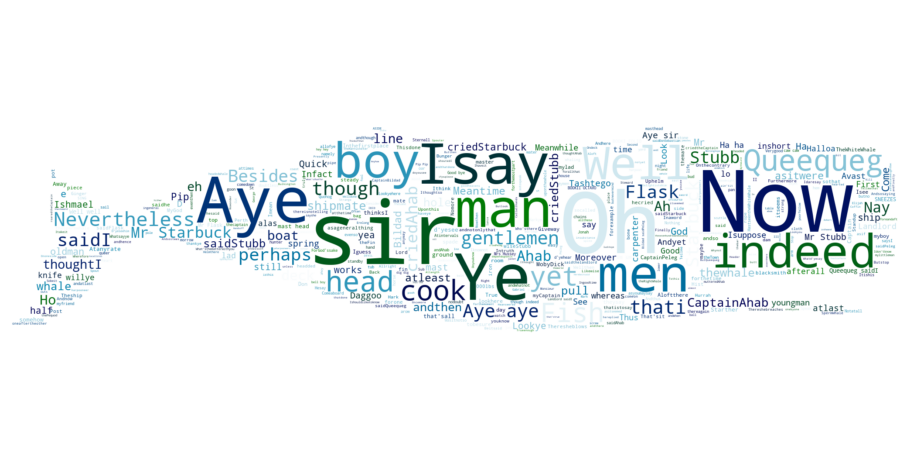

In [97]:

icon = Image.open(WHALE_FILE)
image_mask = Image.new(mode = 'RGB', 
                       size = icon.size, 
                       color = (255, 255, 255))

image_mask.paste(icon, box = icon)

rgb_array = np.array(image_mask)

word_cloud = WordCloud(mask = rgb_array, 
                       background_color = 'white', 
                       max_words = 500,
                      colormap = 'ocean')

word_cloud.generate(novel_as_string)

plt.figure(figsize = (16,10))
plt.imshow(word_cloud, 
           interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [98]:
# Challenge: Use the skull image in the lesson resources to create a word cloud
# for shakespear's play Hamlet    

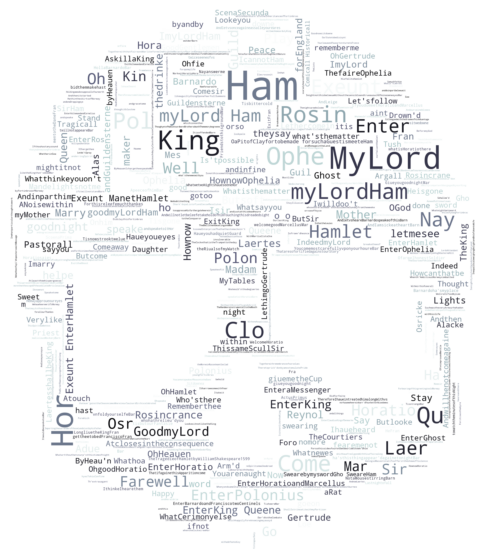

In [99]:
hamlet_corpus = nltk.corpus.gutenberg.words('shakespeare-hamlet.txt')
hamlet_word_list = [''.join(word) for word in hamlet_corpus]
hamlet_as_string = ''.join(hamlet_word_list)

icon_skull = Image.open(SKULL_FILE)
image_mask_skull = Image.new(mode = 'RGB', 
                       size = icon_skull.size, 
                       color = (255, 255, 255))

image_mask_skull.paste(icon_skull, box = icon_skull)

rgb_array = np.array(image_mask_skull)

word_cloud = WordCloud(mask = rgb_array, 
                       background_color = 'white', 
                       max_words = 500,
                      colormap = 'bone')

word_cloud.generate(hamlet_as_string)

plt.figure(figsize = (16,10))
plt.imshow(word_cloud, 
           interpolation = 'bilinear')
plt.axis('off')
plt.show()

# Word Cloud for NonSpam and Spam emails

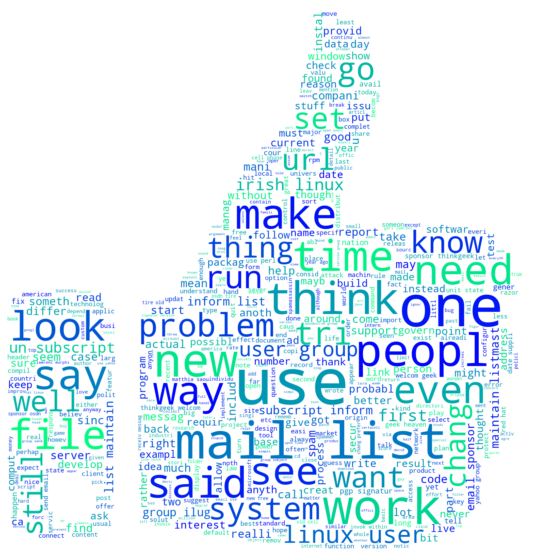

In [100]:

icon_nonspam = Image.open(THUMBS_UP_FILE)
image_mask_nonspam = Image.new(mode = 'RGB', 
                       size = icon_nonspam.size, 
                       color = (255, 255, 255))

image_mask_nonspam.paste(icon_nonspam, box = icon_nonspam)

rgb_array = np.array(image_mask_nonspam)

nonspam_string = ' '.join(flat_list_no_spam)

word_cloud = WordCloud(mask = rgb_array, 
                       background_color = 'white', 
                       max_words = 500,
                      colormap = 'winter')

word_cloud.generate(nonspam_string)

plt.figure(figsize = (16,10))
plt.imshow(word_cloud, 
           interpolation = 'bilinear')
plt.axis('off')
plt.show()

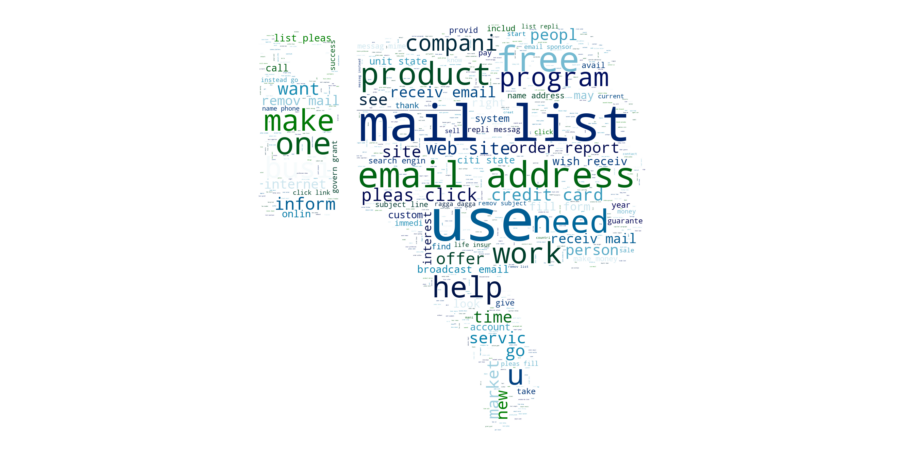

In [101]:

icon_spam = Image.open(THUMBS_DOWN_FILE)
image_mask_spam = Image.new(mode = 'RGB', 
                       size = icon_spam.size, 
                       color = (255, 255, 255))

image_mask_spam.paste(icon_spam, box = icon_spam)

rgb_array = np.array(image_mask_spam)

spam_string = ' '.join(flat_list_spam)

word_cloud = WordCloud(mask = rgb_array, 
                       background_color = 'white', 
                       max_words = 800,
                      colormap = 'ocean')

word_cloud.generate(spam_string)

plt.figure(figsize = (16,10))
plt.imshow(word_cloud, 
           interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [102]:
# Challenge: Look at the word documentation. Use the custom font included in the 
# lesson resources instead of the default font and create a word cloud of the spammy words    

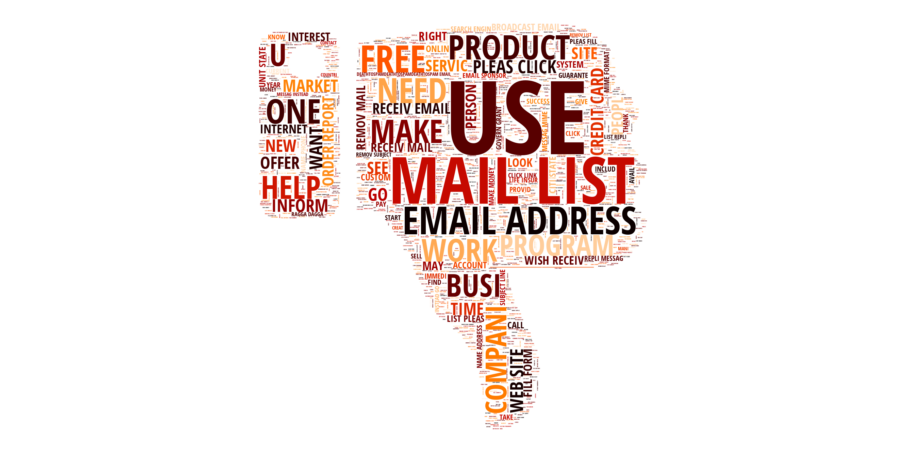

In [103]:

icon_spam = Image.open(THUMBS_DOWN_FILE)
image_mask_nonspam = Image.new(mode = 'RGB', 
                       size = icon_nonspam.size, 
                       color = (255, 255, 255))

image_mask_spam.paste(icon_spam, box = icon_spam)

rgb_array = np.array(image_mask_spam)

spam_string = ' '.join(flat_list_spam)

word_cloud = WordCloud(mask = rgb_array, 
                       background_color = 'white', 
                       max_words = 2000,
                      colormap = 'gist_heat',
                      font_path = CUSTOM_FONT_FILE,
                      max_font_size = 300)

word_cloud.generate(spam_string.upper())

plt.figure(figsize = (16,10))
plt.imshow(word_cloud, 
           interpolation = 'bilinear')
plt.axis('off')
plt.show()

# Generate Vocabulary & Dictionary

In [104]:
stemmed_nested_list = data.MESSAGE.apply(clean_message_no_html)
flat_stemmed_list = [item for sublist in stemmed_nested_list for item in sublist]


In [105]:
unique_words = pd.Series(flat_stemmed_list).value_counts()
print('Number of unique words ', unique_words.shape[0])
unique_words.head()

Number of unique words  27334


http     10660
use       5019
list      4851
email     4367
get       4200
dtype: int64

In [106]:
# Challenge: Create subset of the series called 'frequent_words' that only contain
#     the most common 2,500 words out of the total. Print out the top 10 words

In [107]:
frequent_words = unique_words[0:VOCAB_SIZE]
print('Most common top 10 words: \n', frequent_words[0:10])

Most common top 10 words: 
 http     10660
use       5019
list      4851
email     4367
get       4200
mail      3983
one       3907
free      3202
time      3042
work      2883
dtype: int64


In [108]:
type(frequent_words)

pandas.core.series.Series

## Create vocabulary DataFrame with WORD_ID

In [109]:
word_ids = list(range(0, VOCAB_SIZE))
vocab = pd.DataFrame({'VOCAB_WORD' : frequent_words.index.values}, index = word_ids)
vocab.index.name = 'WORD_ID'
vocab.head()

VOCAB_WORD
WORD_ID           
0             http
1              use
2             list
3            email
4              get

## Save the vocabulary as a CSV file

In [110]:
vocab.to_csv(WORD_ID_FILE, index_label = vocab.index.name, header = vocab.VOCAB_WORD.name)

# Checking if a Word is Part of the Vocabulary

In [111]:
# Challenge: Write a line of code that checks if a particular word is part
# of the vocabulary. Your code should return True is the word is among the 
# 2,500 words and False otherwise. 
# Check these words:
# mcahine 
# learning
# fun
# learn
# data
# science
# app
# brewery

In [112]:
any(vocab.VOCAB_WORD == 'machine')

False

In [113]:
'learning' in set(vocab.VOCAB_WORD)

False

# Exercise: Fin the Email with the Most Number of Words

In [114]:
# Challenge: Print out the number of words in the longest email (after clening & stemming).
# Not the longest email's position in the list of cleaned emails. Print out the stemmed 
# list of words in the longest email. Pring out the longest email from the dataframe

In [115]:
clean_email_lengths = []
for sublist in stemmed_nested_list:
    clean_email_lengths.append(len(sublist))
    
print(clean_email_lengths)

[92, 56, 44, 206, 45, 161, 47, 162, 203, 44, 55, 23, 44, 74, 64, 235, 47, 208, 36, 56, 223, 192, 0, 93, 14, 208, 44, 18, 64, 95, 312, 56, 141, 72, 55, 1066, 48, 139, 2, 90, 78, 4, 47, 70, 44, 75, 38, 12, 38, 63, 47, 51, 71, 80, 25, 275, 36, 63, 19, 18, 14, 40, 57, 18, 77, 28, 102, 41, 226, 68, 120, 5, 52, 0, 40, 40, 208, 0, 40, 146, 62, 114, 64, 253, 1221, 49, 0, 65, 52, 145, 15, 0, 90, 70, 2, 198, 50, 50, 50, 214, 119, 43, 80, 44, 319, 243, 9, 36, 98, 26, 52, 333, 47, 42, 0, 38, 78, 97, 79, 55, 102, 34, 70, 55, 18, 129, 50, 0, 39, 74, 43, 72, 47, 80, 0, 28, 223, 97, 0, 58, 84, 214, 75, 47, 18, 104, 20, 114, 110, 187, 6, 40, 54, 79, 276, 110, 208, 6, 489, 62, 17, 175, 79, 47, 74, 82, 255, 33, 218, 38, 36, 110, 93, 61, 55, 41, 108, 80, 84, 0, 52, 1390, 108, 97, 25, 185, 1, 119, 255, 28, 137, 195, 177, 0, 98, 109, 1465, 0, 108, 150, 113, 38, 153, 38, 42, 0, 0, 383, 188, 77, 330, 14, 92, 92, 104, 372, 187, 241, 143, 254, 14, 98, 135, 223, 65, 90, 226, 217, 129, 38, 94, 204, 255, 215, 146,

In [116]:
# Python List comprehension

clean_email_lengths = [len(sublist) for sublist in stemmed_nested_list]
print('Number of words in the longest email: ', max(clean_email_lengths))

Number of words in the longest email:  7671


In [117]:
print('Email position in the list (and the dataframe) is: ', np.argmax(clean_email_lengths))

Email position in the list (and the dataframe) is:  5775


In [118]:
stemmed_nested_list[np.argmax(clean_email_lengths)]

['yahoo',
 'group',
 'sponsor',
 'dvd',
 'free',
 'p',
 'join',
 'http',
 'new',
 'version',
 'unison',
 'avail',
 'test',
 'incorpor',
 'sever',
 'small',
 'improv',
 'main',
 'chang',
 'fix',
 'bug',
 'potenti',
 'seriou',
 'safeti',
 'consequ',
 'small',
 'number',
 'user',
 'habit',
 'run',
 'one',
 'instanc',
 'unison',
 'time',
 'parallel',
 'user',
 'strongli',
 'encourag',
 'upgrad',
 'other',
 'wait',
 'wish',
 'releas',
 'includ',
 'execut',
 'linux',
 'solari',
 'window',
 'look',
 'maintain',
 'moment',
 'none',
 'activ',
 'develop',
 'regularli',
 'use',
 'unison',
 'window',
 'machin',
 'configur',
 'properli',
 'build',
 'execut',
 'export',
 'grab',
 'http',
 'enjoy',
 'benjamin',
 'chang',
 'sinc',
 'ad',
 'prefer',
 'maxthread',
 'use',
 'limit',
 'number',
 'simultan',
 'file',
 'transfer',
 'ad',
 'backupdir',
 'prefer',
 'control',
 'backup',
 'file',
 'store',
 'basic',
 'support',
 'ad',
 'osx',
 'particular',
 'unison',
 'recogn',
 'one',
 'host',
 'synchron',
 

In [119]:
data.at[np.argmax(clean_email_lengths), 'MESSAGE']

'------------------------ Yahoo! Groups Sponsor ---------------------~-->\n\n4 DVDs Free +s&p Join Now\n\nhttp://us.click.yahoo.com/pt6YBB/NXiEAA/Ey.GAA/26EolB/TM\n\n---------------------------------------------------------------------~->\n\n\n\nA new version of unison is now available for testing.  It incorporates\n\nseveral small improvements over 2.9.1, but the main change is a fix to\n\na bug that had potentially serious safety consequences, but only for\n\nthe very small number of users that are in the habit of running more\n\nthan one instance of Unison at a time, in parallel.  These users are\n\nstrongly encouraged to upgrade.  Others can wait if they wish.\n\n\n\nThe release includes pre-built executables for Linux and Solaris, but\n\nnot Windows.  (We are looking for a Unison-Windows maintainer -- at\n\nthe moment, none of the active developers are regularly using Unison\n\non Windows, and we do not have a machine that is configured properly\n\nfor building executables for exp

# Generate Features & a sparse Matrix

### Creating a DataFrame with One Word Per Column

In [120]:
type(stemmed_nested_list[2])

list

In [121]:
type(stemmed_nested_list.tolist())

list

In [122]:
stemmed_nested_list.tolist()

[['save',
  'life',
  'insur',
  'spend',
  'life',
  'quot',
  'save',
  'g',
  'famili',
  'financi',
  'secur',
  'import',
  'life',
  'quot',
  'save',
  'ke',
  'buy',
  'life',
  'insur',
  'simpl',
  'afford',
  'provid',
  'free',
  'access',
  'best',
  'compani',
  'lowest',
  'rate',
  'life',
  'quot',
  'save',
  'fast',
  'save',
  'money',
  'let',
  'us',
  'help',
  'get',
  'start',
  'best',
  'ue',
  'countri',
  'new',
  'coverag',
  'save',
  'hundr',
  'even',
  'usand',
  'dollar',
  'request',
  'free',
  'quot',
  'lifequot',
  'save',
  'servic',
  'take',
  'less',
  'minut',
  'complet',
  'shop',
  'compar',
  'save',
  'type',
  'life',
  'insur',
  'click',
  'free',
  'quot',
  'protect',
  'famili',
  'best',
  'invest',
  'r',
  'make',
  'receipt',
  'email',
  'error',
  'wish',
  'remov',
  'list',
  'pleas',
  'click',
  'type',
  'remov',
  'resid',
  'state',
  'prohibit',
  'solicit',
  'ce',
  'pleas',
  'disregard',
  'email'],
 ['fight',
  

In [123]:
word_columns_df = pd.DataFrame.from_records(stemmed_nested_list.tolist())
word_columns_df.head()

0      1       2      3           4         5       6     7       8     \
0     save   life   insur  spend        life      quot    save     g  famili   
1    fight   risk  cancer   http        slim  guarante    lose    lb     day   
2    fight   risk  cancer   http        slim  guarante    lose    lb     day   
3    adult   club   offer   free  membership   instant  access  site    user   
4  thought  might    like   slim    guarante      lose      lb   day    http   

      9     ...  7661  7662  7663  7664  7665  7666  7667  7668  7669  7670  
0  financi  ...  None  None  None  None  None  None  None  None  None  None  
1     http  ...  None  None  None  None  None  None  None  None  None  None  
2     http  ...  None  None  None  None  None  None  None  None  None  None  
3     name  ...  None  None  None  None  None  None  None  None  None  None  
4    fight  ...  None  None  None  None  None  None  None  None  None  None  

[5 rows x 7671 columns]

In [124]:
word_columns_df.shape

(5796, 7671)

### Splitting the Data into a Training and Testing Dataset

In [125]:
x_train, x_test, y_train, y_test = train_test_split(word_columns_df, data.CATEGORY,
                                                   test_size = 0.3,
                                                   random_state = 42)

In [126]:
print('Fraction of training set is : ', x_train.shape[0]/word_columns_df.shape[0])

Fraction of training set is :  0.6999654934437544


In [127]:
x_train.index.name = x_test.index.name = 'DOC_ID'
x_train.head()

0       1      2          3            4      5        6     \
DOC_ID                                                                   
4844         ye    inde  agent  directori       verita     cd     unix   
4727    problem    come    tri     instal  harddissssk   like  alreadi   
5022     origin  messag   date        mon          aug   chad  norwood   
3504      inlin    folk  sever      major     internet  outag     morn   
3921        url    http   date       bath     chronicl   None     None   

                7      8        9     ...  7661  7662  7663  7664  7665  7666  \
DOC_ID                                ...                                       
4844    subdirectori   file     call  ...  None  None  None  None  None  None   
4727           mount   http    yahoo  ...  None  None  None  None  None  None   
5022            sven     cc  subject  ...  None  None  None  None  None  None   
3504          across  major   provid  ...  None  None  None  None  None  None   
3921            None   None     None  ...  None  None  None  None  None  None   

        7667  7668  7669  7670  
DOC_ID                          
4844    None  None  None  None  
4727    None  None  None  None  
5022    None  None  None  None  
3504    None  None  None  None  
3921    None  None  None  None  

[5 rows x 7671 columns]

In [128]:
y_train.head()

DOC_ID
4844    0
4727    0
5022    0
3504    0
3921    0
Name: CATEGORY, dtype: int64

In [129]:
x_test.head()

0        1       2         3          4         5          6     \
DOC_ID                                                                        
4675    interest    alway  wonder     thing        bad    exampl       goto   
4220         url     http    date     final        gdc     europ     review   
2484     stephen  william  mailto  swilliam     weaken      food   transact   
2418          el      mon     sep  bitbitch      wrote     eugen       mani   
5110       music   school    joke  american  conductor  european  conductor   

             7         8             9     ...  7661  7662  7663  7664  7665  \
DOC_ID                                     ...                                 
4675      languag   support          goto  ...  None  None  None  None  None   
4220    confernec   session           ect  ...  None  None  None  None  None   
2484     argument      note  neighborhood  ...  None  None  None  None  None   
2418         homo    friend         lover  ...  None  None  None  None  None   
5110         talk  european     conductor  ...  None  None  None  None  None   

        7666  7667  7668  7669  7670  
DOC_ID                                
4675    None  None  None  None  None  
4220    None  None  None  None  None  
2484    None  None  None  None  None  
2418    None  None  None  None  None  
5110    None  None  None  None  None  

[5 rows x 7671 columns]

In [130]:
y_test.head()

DOC_ID
4675    0
4220    0
2484    0
2418    0
5110    0
Name: CATEGORY, dtype: int64

### Create a Sparse Matrix for the Training Data

In [131]:
word_index = pd.Index(vocab.VOCAB_WORD)

In [132]:
type(word_index)

pandas.core.indexes.base.Index

In [133]:
type(word_index[3])

str

In [134]:
word_index.get_loc('thu')

393

In [135]:
def make_sparse_matrix(df, indexed_words, labels):
    """
    Returns sparse matrix as dataframe
    
    df: A dataframe with words in the columns with a document is as an index(x_train or _test)
    indexed_words: index of words ordered by word id 
    labels: category as a series (y_train or y_test)
    """
    
    nr_rows = df.shape[0]
    nr_cols = df.shape[1]
    word_set = set(indexed_words)
    dict_list = []
    for i in range(nr_rows):
        for j in range(nr_cols):
            
            word = df.iat[i,j]
            if word in word_set:
                doc_id = df.index[i]
                word_id = indexed_words.get_loc(word)
                category = labels.at[doc_id]
                    
                item = {'LABEL' : category, 'DOC_ID' : doc_id,
                        'OCCURENCE' : 1, 'WORD_ID' : word_id}
                    
                dict_list.append(item)
                
    return pd.DataFrame(dict_list)

In [136]:
%%time

sparse_train_df = make_sparse_matrix(x_train, word_index, y_train)

Wall time: 38min 17s


In [137]:
sparse_train_df.head()

LABEL  DOC_ID  OCCURENCE  WORD_ID
0      0    4844          1      265
1      0    4844          1     1241
2      0    4844          1      502
3      0    4844          1      308
4      0    4844          1      254

In [138]:
sparse_train_df[:5]

LABEL  DOC_ID  OCCURENCE  WORD_ID
0      0    4844          1      265
1      0    4844          1     1241
2      0    4844          1      502
3      0    4844          1      308
4      0    4844          1      254

In [139]:
sparse_train_df.shape

(429243, 4)

In [140]:
sparse_train_df.tail()

LABEL  DOC_ID  OCCURENCE  WORD_ID
429238      1     860          1       47
429239      1     860          1     1429
429240      1     860          1       26
429241      1     860          1       21
429242      1     860          1      126

In [141]:
sparse_train_df[-5:]

LABEL  DOC_ID  OCCURENCE  WORD_ID
429238      1     860          1       47
429239      1     860          1     1429
429240      1     860          1       26
429241      1     860          1       21
429242      1     860          1      126

### Combine words that occur more than once with Pandas group() Method

In [142]:
train_grouped = sparse_train_df.groupby(['DOC_ID', 'WORD_ID', 'LABEL']).sum()
train_grouped.head()

OCCURENCE
DOC_ID WORD_ID LABEL           
0      2       1              1
       3       1              2
       4       1              1
       7       1              3
       11      1              1

In [143]:
vocab.at[3, 'VOCAB_WORD']

'email'

In [144]:
data.MESSAGE[3]

"##################################################\n\n#                                                #\n\n#                 Adult Club                     #\n\n#           Offers FREE Membership               #\n\n#                                                #\n\n##################################################\n\n\n\n>>>>>  INSTANT ACCESS TO ALL SITES NOW\n\n>>>>>  Your User Name And Password is.\n\n>>>>>  User Name: zzzz@spamassassin.taint.org\n\n>>>>>  Password: 760382\n\n\n\n5 of the Best Adult Sites on the Internet for FREE!\n\n---------------------------------------\n\nNEWS 08/18/02\n\nWith just over 2.9 Million Members that signed up for FREE, Last month there were 721,184 New\n\nMembers. Are you one of them yet???\n\n---------------------------------------\n\nOur Membership FAQ\n\n\n\nQ. Why are you offering free access to 5 adult membership sites for free?\n\nA. I have advertisers that pay me for ad space so you don't have to pay for membership.\n\n\n\nQ. Is it true m

In [145]:
train_grouped = train_grouped.reset_index()
train_grouped.head()

DOC_ID  WORD_ID  LABEL  OCCURENCE
0       0        2      1          1
1       0        3      1          2
2       0        4      1          1
3       0        7      1          3
4       0       11      1          1

In [146]:
train_grouped.tail()

DOC_ID  WORD_ID  LABEL  OCCURENCE
258367    5795     2029      0          1
258368    5795     2037      0          1
258369    5795     2269      0          1
258370    5795     2335      0          1
258371    5795     2381      0          1

In [147]:
vocab.at[7, 'VOCAB_WORD']

'free'

In [148]:
data.MESSAGE[0]

'<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN">\n\n<HTML><HEAD>\n\n<META content=3D"text/html; charset=3Dwindows-1252" http-equiv=3DContent-T=\n\nype>\n\n<META content=3D"MSHTML 5.00.2314.1000" name=3DGENERATOR></HEAD>\n\n<BODY><!-- Inserted by Calypso -->\n\n<TABLE border=3D0 cellPadding=3D0 cellSpacing=3D2 id=3D_CalyPrintHeader_ r=\n\nules=3Dnone \n\nstyle=3D"COLOR: black; DISPLAY: none" width=3D"100%">\n\n  <TBODY>\n\n  <TR>\n\n    <TD colSpan=3D3>\n\n      <HR color=3Dblack noShade SIZE=3D1>\n\n    </TD></TR></TD></TR>\n\n  <TR>\n\n    <TD colSpan=3D3>\n\n      <HR color=3Dblack noShade SIZE=3D1>\n\n    </TD></TR></TBODY></TABLE><!-- End Calypso --><!-- Inserted by Calypso=\n\n --><FONT \n\ncolor=3D#000000 face=3DVERDANA,ARIAL,HELVETICA size=3D-2><BR></FONT></TD><=\n\n/TR></TABLE><!-- End Calypso --><FONT color=3D#ff0000 \n\nface=3D"Copperplate Gothic Bold" size=3D5 PTSIZE=3D"10">\n\n<CENTER>Save up to 70% on Life Insurance.</CENTER></FONT><FONT color=3D#ff=\n\n0000

In [149]:
train_grouped.shape

(258372, 4)

### Save Training Data as .txt File

In [150]:
np.savetxt(TRAINING_DATA_SPARSE_MATRIX_FILE, train_grouped, fmt = '%d')

In [151]:
train_grouped.columns

Index(['DOC_ID', 'WORD_ID', 'LABEL', 'OCCURENCE'], dtype='object')

# Challenge

##### Can you create a sparse matrix for the test data. Group the occurrences of the same word in the same email. Then save the data as a .txt file

In [152]:

sparse_test_df = make_sparse_matrix(x_test, word_index, y_test)

In [153]:
sparse_test_df.head()

LABEL  DOC_ID  OCCURENCE  WORD_ID
0      0    4675          1       89
1      0    4675          1      298
2      0    4675          1      550
3      0    4675          1       84
4      0    4675          1      468

In [154]:
test_grouped = sparse_test_df.groupby(['DOC_ID', 'WORD_ID', 'LABEL']).sum().reset_index()
test_grouped.head()

DOC_ID  WORD_ID  LABEL  OCCURENCE
0       8        2      1          1
1       8        3      1          4
2       8        4      1          2
3       8        5      1          1
4       8        6      1          2

In [155]:
np.savetxt(TEST_DATA_SPARSE_MATRIX_FILE, train_grouped, fmt = '%d')

## Challenge:
    
#### How many individual emails are included in the testing .txt file?

#### After Splitting and shuffling our data, how many emails are included in the x_test DataFrame? 

#### Is the number the same?

#### If not, which emails were excluded and why? 

In [156]:
len(set(train_grouped.DOC_ID))

4013

In [157]:
len(set(test_grouped.DOC_ID))

1724

In [158]:
len(x_test)

1739

In [159]:
missing_emails_test = set(x_test.index.values) - set(test_grouped.DOC_ID)
print(missing_emails_test)

{471, 1700, 134, 1670, 1544, 298, 734, 240, 945, 274, 179, 339, 439, 765, 670}


# Read and Load Features from .txt file to NumPy Array

In [160]:
sparse_train_data = np.loadtxt(TRAINING_DATA_SPARSE_MATRIX_FILE, delimiter = ' ', dtype = int)
sparse_test_data = np.loadtxt(TEST_DATA_SPARSE_MATRIX_FILE, delimiter = ' ', dtype = int)

In [161]:
print('Number of rows in training file is: ',sparse_train_data.shape[0])
print('Number of rows in test file is: ',sparse_test_data.shape[0])

Number of rows in training file is:  258372
Number of rows in test file is:  258372


In [162]:
print('Number of emails in training file: ', np.unique(sparse_train_data[: , 0]).size)
print('Number of emails in test file: ', np.unique(sparse_test_data[: , 0]).size)

Number of emails in training file:  4013
Number of emails in test file:  4013


# How to create an Empty DataFrame

In [163]:
column_names = ['DOC_ID'] + ['CATEGORY'] + list(range(0,VOCAB_SIZE))
column_names[:5]

['DOC_ID', 'CATEGORY', 0, 1, 2]

In [164]:
len(column_names)

2502

In [165]:
index_names = np.unique(sparse_train_data[:,0])
index_names

array([   0,    1,    2, ..., 5791, 5794, 5795])

In [166]:
full_train_data = pd.DataFrame(index = index_names, columns = column_names)

In [167]:
full_train_data.head()

DOC_ID CATEGORY    0    1    2    3    4    5    6    7  ... 2490 2491 2492  \
0    NaN      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
1    NaN      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
2    NaN      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
3    NaN      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
4    NaN      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   

  2493 2494 2495 2496 2497 2498 2499  
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[5 rows x 2502 columns]

In [168]:
full_train_data.fillna(value = 0)

DOC_ID  CATEGORY  0  1  2  3  4  5  6  7  ...  2490  2491  2492  2493  \
0          0         0  0  0  0  0  0  0  0  0  ...     0     0     0     0   
1          0         0  0  0  0  0  0  0  0  0  ...     0     0     0     0   
2          0         0  0  0  0  0  0  0  0  0  ...     0     0     0     0   
3          0         0  0  0  0  0  0  0  0  0  ...     0     0     0     0   
4          0         0  0  0  0  0  0  0  0  0  ...     0     0     0     0   
...      ...       ... .. .. .. .. .. .. .. ..  ...   ...   ...   ...   ...   
5789       0         0  0  0  0  0  0  0  0  0  ...     0     0     0     0   
5790       0         0  0  0  0  0  0  0  0  0  ...     0     0     0     0   
5791       0         0  0  0  0  0  0  0  0  0  ...     0     0     0     0   
5794       0         0  0  0  0  0  0  0  0  0  ...     0     0     0     0   
5795       0         0  0  0  0  0  0  0  0  0  ...     0     0     0     0   

      2494  2495  2496  2497  2498  2499  
0        0     0     0     0     0     0  
1        0     0     0     0     0     0  
2        0     0     0     0     0     0  
3        0     0     0     0     0     0  
4        0     0     0     0     0     0  
...    ...   ...   ...   ...   ...   ...  
5789     0     0     0     0     0     0  
5790     0     0     0     0     0     0  
5791     0     0     0     0     0     0  
5794     0     0     0     0     0     0  
5795     0     0     0     0     0     0  

[4013 rows x 2502 columns]

# Create a full Matrix from a Sparse Matrix

In [169]:
def make_full_matrix(sparse_matrix, number_of_words, document_index = 0, word_index = 1, category_index = 2, frequency_index = 3):
    """ 
    Form a full matrix from a sparse matrix. Return a pandas Data Frame.
    Keyword arguments:
    sparse_matrix -- numpy array
    number_of_words --size of the vocabulary. Total number of tokens.
    document_index --position of the document id in the sparse matrix. Default: 1st column
    word_index --position of the word id in the sparse matrix. Default: 2st column
    category_index --position of the category id in the sparse matrix. Default: 3st column
    frequency_inde --position of the occurrences of word in the sparse matrix. Default: 4st column
    """
    
    column_names = ['DOC_ID'] + ['CATEGORY'] + list(range(0,VOCAB_SIZE))
    document_id_names = np.unique(sparse_matrix[:,0])
    full_matrix = pd.DataFrame(index = document_id_names, columns = column_names)
    full_matrix.fillna(value = 0, inplace = True)
    
    
    for i in range(sparse_matrix.shape[0]):
        document_number = sparse_matrix[i][document_index]
        word_id = sparse_matrix[i][word_index]
        label = sparse_matrix[i][category_index]
        occurrence = sparse_matrix[i][frequency_index]
    
    
        full_matrix.at[document_number, 'DOC_ID'] = document_number
        full_matrix.at[document_number, 'CATEGORY'] = label
        full_matrix.at[document_number, word_id] = occurrence
        
    full_matrix.set_index('DOC_ID', inplace = True)
    return full_matrix

In [170]:
%%time
full_train_data = make_full_matrix(sparse_train_data, VOCAB_SIZE)

Wall time: 33.8 s


In [171]:
full_train_data.head()

CATEGORY  0  1  2  3  4  5  6   7  8  ...  2490  2491  2492  2493  \
DOC_ID                                        ...                           
0              1  0  0  1  2  1  0  0   3  0  ...     0     0     0     0   
1              1  7  1  2  0  1  0  0   1  0  ...     0     0     0     0   
2              1  6  1  1  0  1  0  0   1  0  ...     0     0     0     0   
3              1  6  0  0  2  4  0  3  14  0  ...     0     0     0     0   
4              1  5  1  2  0  1  0  0   1  0  ...     0     0     0     0   

        2494  2495  2496  2497  2498  2499  
DOC_ID                                      
0          0     0     0     0     0     0  
1          0     0     0     0     0     0  
2          0     0     0     0     0     0  
3          0     0     0     0     0     0  
4          0     0     0     0     0     0  

[5 rows x 2501 columns]

# Training the Naive Bayes Model

## Calculating the Probability of Spam

In [172]:
#Calculate the probability of spam. store this value in a variable called prob_spam

In [173]:
full_train_data.CATEGORY.size

4013

In [174]:
full_train_data.CATEGORY.sum()

1248

In [175]:
prob_spam = full_train_data.CATEGORY.sum() / full_train_data.CATEGORY.size
print('Probability of spam is ', prob_spam)

Probability of spam is  0.310989284824321


# Total Number of Words/Tokens

In [176]:
full_train_features = full_train_data.loc[:, full_train_data.columns != 'CATEGORY']

In [177]:
full_train_features.head()

0     1     2     3     4     5     6     7     8     9     ...  2490  \
DOC_ID                                                              ...         
0          0     0     1     2     1     0     0     3     0     0  ...     0   
1          7     1     2     0     1     0     0     1     0     0  ...     0   
2          6     1     1     0     1     0     0     1     0     0  ...     0   
3          6     0     0     2     4     0     3    14     0     0  ...     0   
4          5     1     2     0     1     0     0     1     0     0  ...     0   

        2491  2492  2493  2494  2495  2496  2497  2498  2499  
DOC_ID                                                        
0          0     0     0     0     0     0     0     0     0  
1          0     0     0     0     0     0     0     0     0  
2          0     0     0     0     0     0     0     0     0  
3          0     0     0     0     0     0     0     0     0  
4          0     0     0     0     0     0     0     0     0  

[5 rows x 2500 columns]

In [178]:
email_lengths = full_train_features.sum(axis = 1)
email_lengths.shape

(4013,)

In [179]:
total_word_count = email_lengths.sum()
total_word_count

429243

## Number of tokens in Spam & Non-spam emails

In [180]:
# Create a subset of the emails_lengths series that only contains the spam 
#messages. Call the subset spam_lengths. Then count the total number of words that occure in
#spam emails.


#do the same for the non-spam emails

In [181]:
spam_lengths = email_lengths[full_train_data.CATEGORY == 1]
spam_lengths.shape

(1248,)

In [182]:
spam_word_count = spam_lengths.sum()
spam_word_count

176315

In [183]:
nonspam_lengths = email_lengths[full_train_data.CATEGORY == 0]
nonspam_lengths.shape

(2765,)

In [184]:
nonspam_word_count = nonspam_lengths.sum()
nonspam_word_count

252928

In [185]:
email_lengths.shape[0] - spam_lengths.shape[0] - nonspam_lengths.shape[0]

0

In [186]:
nonspam_word_count = nonspam_lengths.sum()
nonspam_word_count

252928

In [187]:
spam_word_count + nonspam_word_count - total_word_count

0

In [188]:
# Can you figure out if spam emails or non-spam emails tend to be longer? Which
# category contains more tokens? 

In [189]:
print('Average number of words in spam emails {: 3f}'.format(spam_word_count / spam_lengths.shape[0]))
print('Average number of words in nonspam emails {: 3f}'.format(nonspam_word_count / nonspam_lengths.shape[0]))

Average number of words in spam emails  141.278045
Average number of words in nonspam emails  91.474864


 ## Summing the Tokens Occuring in Spam

In [190]:
full_train_features.shape

(4013, 2500)

##### Create a subset of all the rows that correspond to spam messages

In [191]:
train_spam_tokens = full_train_features.loc[full_train_data.CATEGORY == 1]
train_spam_tokens.head()

0     1     2     3     4     5     6     7     8     9     ...  2490  \
DOC_ID                                                              ...         
0          0     0     1     2     1     0     0     3     0     0  ...     0   
1          7     1     2     0     1     0     0     1     0     0  ...     0   
2          6     1     1     0     1     0     0     1     0     0  ...     0   
3          6     0     0     2     4     0     3    14     0     0  ...     0   
4          5     1     2     0     1     0     0     1     0     0  ...     0   

        2491  2492  2493  2494  2495  2496  2497  2498  2499  
DOC_ID                                                        
0          0     0     0     0     0     0     0     0     0  
1          0     0     0     0     0     0     0     0     0  
2          0     0     0     0     0     0     0     0     0  
3          0     0     0     0     0     0     0     0     0  
4          0     0     0     0     0     0     0     0     0  

[5 rows x 2500 columns]

In [192]:
train_spam_tokens.tail()

0     1     2     3     4     5     6     7     8     9     ...  2490  \
DOC_ID                                                              ...         
1885       1     0     0     2     0     1     0     0     0     0  ...     0   
1887       2     0     0     0     0     0     0     0     0     0  ...     0   
1889       0     0     0     0     0     0     0     0     1     0  ...     0   
1890       2     0     0     0     1     0     0     2     0     0  ...     0   
1895       1     1     1     0     0     0     0     0     0     0  ...     0   

        2491  2492  2493  2494  2495  2496  2497  2498  2499  
DOC_ID                                                        
1885       0     0     0     0     0     0     0     0     0  
1887       0     0     0     0     0     0     0     0     0  
1889       0     0     0     0     0     0     0     0     0  
1890       0     0     0     0     0     0     0     0     0  
1895       0     0     0     0     0     0     0     0     0  

[5 rows x 2500 columns]

In [193]:
train_spam_tokens.shape

(1248, 2500)

In [194]:
summed_spam_tokens = train_spam_tokens.sum(axis = 0) + 1
summed_spam_tokens.shape

(2500,)

In [195]:
summed_spam_tokens.tail()

2495    12
2496     9
2497     7
2498     1
2499     1
dtype: int64

### Repeat the process for nonspam messages. Sum up the tokens that occur in the 
### non spam messages. Store the values in a variable called summed_nonspam_tokens

In [196]:
train_nonspam_tokens = full_train_features.loc[full_train_data.CATEGORY == 0]
train_nonspam_tokens.head()

0     1     2     3     4     5     6     7     8     9     ...  2490  \
DOC_ID                                                              ...         
1896       1     2     1     0     1     1     2     0     1     1  ...     0   
1898       2     1     0     1     1     0     2     1     0     0  ...     0   
1899       2     1     1     0     0     1     1     0     1     0  ...     0   
1900       3     4     0     1     0     0     1     1     1     1  ...     0   
1901       2     2     0     1     0     0     1     1     0     0  ...     0   

        2491  2492  2493  2494  2495  2496  2497  2498  2499  
DOC_ID                                                        
1896       0     0     0     0     0     0     0     0     0  
1898       0     0     0     0     0     0     0     0     0  
1899       0     0     0     0     0     0     0     0     0  
1900       0     0     0     0     0     0     0     0     0  
1901       0     0     0     0     0     0     0     0     0  

[5 rows x 2500 columns]

In [197]:
train_nonspam_tokens.shape

(2765, 2500)

In [198]:
summed_nonspam_tokens = train_nonspam_tokens.sum(axis = 0) + 1
summed_nonspam_tokens.shape

(2500,)

In [199]:
summed_nonspam_tokens.tail()

2495    20
2496    26
2497    26
2498    36
2499    29
dtype: int64

# P(Token|Spam) - Probability that a token occurs given the Email is spam

In [200]:
probability_tokens_spam = summed_spam_tokens / (spam_word_count + VOCAB_SIZE)

In [201]:
probability_tokens_spam[:5]

0    0.012186
1    0.005229
2    0.006806
3    0.011308
4    0.006817
dtype: float64

In [202]:
probability_tokens_spam.sum()

1.0

# P(Token|Nonspam) - Probability that a token occurs given the Email is nonspam

In [203]:
probability_tokens_nonspam = summed_nonspam_tokens / (nonspam_word_count + VOCAB_SIZE)

In [204]:
probability_tokens_nonspam[:5]

0    0.021470
1    0.010140
2    0.008006
3    0.003672
4    0.006311
dtype: float64

In [205]:
probability_tokens_nonspam.sum()

1.0

# P(Token) - Probability that Token occurrs

In [206]:
probability_tokens_all = full_train_features.sum(axis = 0) / total_word_count

In [207]:
probability_tokens_all.sum()

1.0

# Save the Trained Model

In [208]:
np.savetxt(TOKEN_SPAM_PROBABILITY_FILE, probability_tokens_spam)
np.savetxt(TOKEN_NONSPAM_PROBABILITY_FILE, probability_tokens_nonspam)
np.savetxt(TOKEN_ALL_PROBABILITY_FILE, probability_tokens_all)


# Prepare Test Data
#### Create a full matrix from the sparse_test_data. 
#### Time the function call
#### How long does it take?
#### Seperate the features and the target values
#### Save these seperate .txt files: TEST_TARGET_FILE and TEST_TARGET_FILE

In [209]:
sparse_test_data.shape

(258372, 4)

In [210]:
%%time
full_test_data = make_full_matrix(sparse_test_data, VOCAB_SIZE)

Wall time: 31.6 s


In [211]:
x_test = full_test_data.loc[:, full_test_data.columns != 'CATEGORY']
y_test = full_test_data.CATEGORY

In [212]:
np.savetxt(TEST_TARGET_FILE, y_test)
np.savetxt(TEST_FEATURE_MATRIX, x_test)

# #######
# #######

# Bayes Classifier - Tesing, Inference and Evaluation

In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [214]:
# Features
x_test = np.loadtxt(TEST_FEATURE_MATRIX, delimiter = ' ')

#Target
y_test = np.loadtxt(TEST_TARGET_FILE, delimiter = ' ')

#Token Probabilities
probability_token_spam = np.loadtxt(TOKEN_SPAM_PROBABILITY_FILE, delimiter = ' ')
probability_token_nonspam = np.loadtxt(TOKEN_NONSPAM_PROBABILITY_FILE, delimiter = ' ')
probability_all_tokens = np.loadtxt(TOKEN_ALL_PROBABILITY_FILE, delimiter = ' ')

In [215]:
x_test[:5]

array([[0., 0., 1., ..., 0., 0., 0.],
       [7., 1., 2., ..., 0., 0., 0.],
       [6., 1., 1., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       [5., 1., 2., ..., 0., 0., 0.]])

### Calculating the Joing Probability using The Dot Product Method

In [216]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
print('a = ', a)
print('b = ', b)
a.dot(b)

a =  [1 2 3]
b =  [4 5 6]


32

In [217]:
1*4 + 2*5 + 3*6

32

In [218]:
c = np.array([[1, 2], [3, 4], [5, 6]])
print('Shape of c is ', c.shape)
print(c)

Shape of c is  (3, 2)
[[1 2]
 [3 4]
 [5 6]]


In [219]:
print(a.dot(c))
print('Shape of the dot product is ', a.dot(c).shape)

[22 28]
Shape of the dot product is  (2,)


In [220]:
[1*1 + 2*3 + 3*5, 1*2 + 2*4 + 3*6]

[22, 28]

 **Challenge** Can you figure out the dimensions of the dot product between x_Test and probability_token_spam?

In [221]:
x_test.shape

(4013, 2500)

In [222]:
probability_token_spam.shape

(2500,)

In [223]:
x_test.dot(probability_token_spam).shape

(4013,)

In [224]:
x_test.dot(probability_token_spam)

array([0.23531583, 0.17415206, 0.14573721, ..., 0.09851523, 0.09684311,
       0.31167408])

## Prior - A belief or a guess of some quantity.
#### We're going to express a guess about the percentage of spam messages in the test dataset for clarity

# $$P(Spam \, | \, x) = \frac{P(x \, | \, Spam \,) \,P(Spam)} {P(x)}$$

In [225]:
PROBABILITY_SPAM = 0.310989284824321

In [226]:
np.log(probability_token_spam)

array([ -4.4074857 ,  -5.2535605 ,  -4.98996294, ..., -10.14819688,
       -12.09410703, -12.09410703])

# Joint Probability in log format

In [227]:
joint_log_spam = x_test.dot(np.log(probability_token_spam) - np.log(probability_all_tokens)) + np.log(PROBABILITY_SPAM)

In [228]:
joint_log_spam[:5]

array([ 36.61196984, -12.7742796 ,   2.16552937,  55.38096683,
       -14.05748216])

# $$P(NonSpam \, | \, x) = \frac{P(x \, | \, NonSpam \,) \,(1-P(Spam))} {P(x)}$$

In [229]:
joint_log_nonspam = x_test.dot(np.log(probability_token_spam) - np.log(probability_all_tokens)) + np.log(1 - PROBABILITY_SPAM)

In [230]:
joint_log_nonspam[:5]

array([ 37.40746821, -11.97878123,   2.96102774,  56.1764652 ,
       -13.2619838 ])

# Making Prediction
### Checking for the higher Joint Probability

# $$P(Spam \, | \, x) \, > \, P(NonSpam \, | \, x)$$
<center>**OR**<center>
<br>
$$P(Spam \, | \, x) \, > \, P(NonSpam \, | \, x)$$ 


In [231]:
prediction = joint_log_spam > joint_log_nonspam
prediction[-5:]

array([False, False, False, False, False])

In [232]:
prediction[-5:]*1

array([0, 0, 0, 0, 0])

In [233]:
y_test[-5:]

array([0., 0., 0., 0., 0.])

# Simplify
# $$P(x \, | \, Spam) \, P(Spam) ≠ \frac{P(x \, | \, Spam \,) \,P(Spam)} {P(x)}$$


In [234]:
joint_log_spam = x_test.dot(np.log(probability_token_spam)) + np.log(PROBABILITY_SPAM)
joint_log_nonspam = x_test.dot(np.log(probability_token_spam)) + np.log(1 - PROBABILITY_SPAM)

# Metrics and Evaluation
## Accuracy

In [235]:
correct_documents = (y_test == prediction).sum()
print('Documents classified correctly are ', correct_documents)

Documents classified correctly are  2765


In [236]:
incorrect_documents = (x_test.shape[0]- correct_documents)
print('Incorrectly classified documents are ', incorrect_documents)

Incorrectly classified documents are  1248


# $$Accuracy = \frac{Nr. \, of \, correct \, predictions} {Total \, nr. \, of \, predictions)}$$

In [237]:
correct_documents / len(x_test)

0.689010715175679

In [238]:
fraction_wrong_documents = incorrect_documents / len(x_test)
print('Fraction of incorretly classified documents is {:.2%}'.format(fraction_wrong_documents))
print('Accuracy of the model is {:.2%}'.format(1-fraction_wrong_documents))

Fraction of incorretly classified documents is 31.10%
Accuracy of the model is 68.90%


## Visualising the Results

In [264]:
yaxis_label = 'P(X | Spam)'
xaxis_label = 'P(X | Nonspam)'

linedata = np.linspace(start=-14000, stop=1, num=1000)

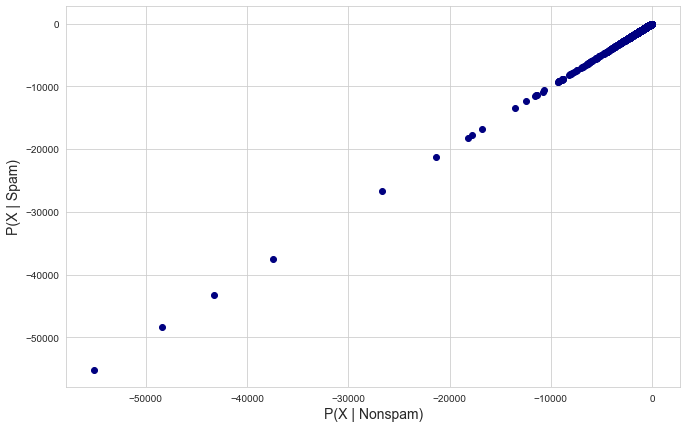

In [265]:
plt.figure(figsize =(11, 7))
plt.ylabel(yaxis_label, fontsize = 14)
plt.xlabel(xaxis_label, fontsize = 14)


# plt.xlim([-13000, 1])
# plt.ylim([-13000, 1])

plt.scatter(joint_log_nonspam, joint_log_spam, color = 'navy')

plt.show()

## The Decision Boundary

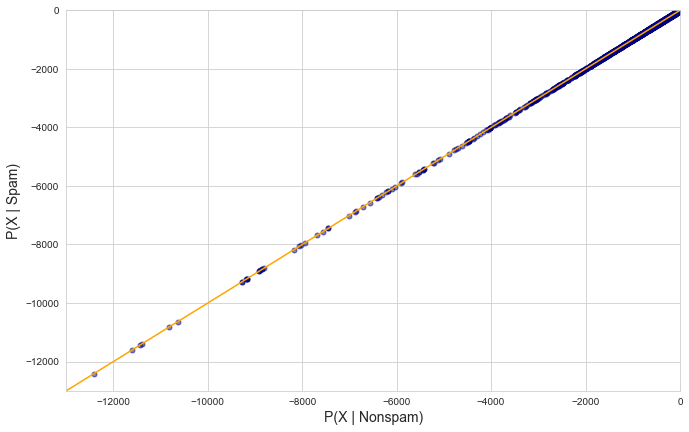

In [266]:
plt.figure(figsize =(11, 7))
plt.ylabel(yaxis_label, fontsize = 14)
plt.xlabel(xaxis_label, fontsize = 14)


plt.xlim([-13000, 1])
plt.ylim([-13000, 1])

plt.scatter(joint_log_nonspam, joint_log_spam, color = 'navy', alpha = 0.5, s = 25)
plt.plot(linedata, linedata, color = 'orange')
plt.show()

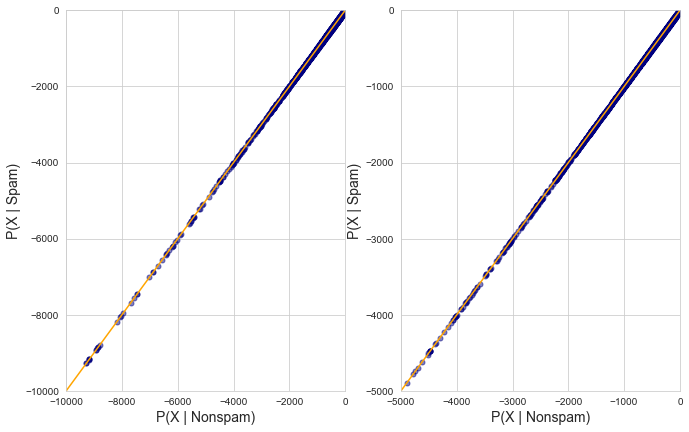

In [268]:
plt.figure(figsize =(11, 7))

plt.subplot(1, 2, 1)
plt.ylabel(yaxis_label, fontsize = 14)
plt.xlabel(xaxis_label, fontsize = 14)


plt.xlim([-10000, 1])
plt.ylim([-10000, 1])

plt.scatter(joint_log_nonspam, joint_log_spam, color = 'navy', alpha = 0.5, s = 25)
plt.plot(linedata, linedata, color = 'orange')

plt.subplot(1, 2, 2)
plt.ylabel(yaxis_label, fontsize = 14)
plt.xlabel(xaxis_label, fontsize = 14)


plt.xlim([-5000, 1])
plt.ylim([-5000, 1])

plt.scatter(joint_log_nonspam, joint_log_spam, color = 'navy', alpha = 0.5, s = 25)
plt.plot(linedata, linedata, color = 'orange')

plt.show()

In [269]:
sns.set_style('whitegrid')
labels = 'Actual Category'

summary_df = pd.DataFrame({yaxis_label: joint_log_spam, xaxis_label: joint_log_nonspam, 
                          labels: y_test})

C:\Users\Nyambura\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


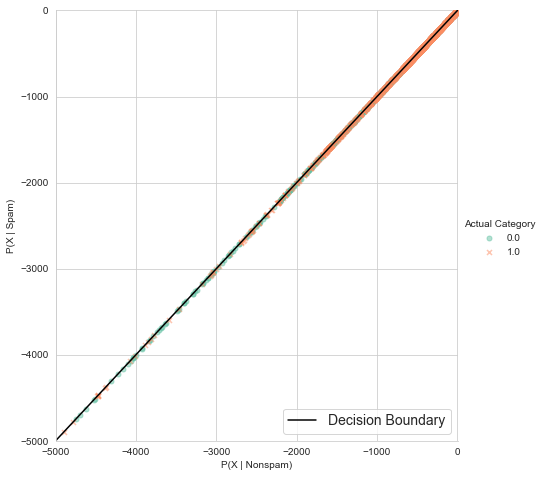

In [285]:
sns.lmplot(x = xaxis_label, y = yaxis_label, data = summary_df, size = 6.5, fit_reg = False,
          scatter_kws = {'alpha': 0.5, 's' : 25}, hue = labels, markers = ['o','x'], 
          palette = 'Set2')

plt.xlim([-5000, 1])
plt.ylim([-5000, 1])

plt.plot(linedata, linedata, color = 'black' )

plt.legend({'Decision Boundary'}, loc = 'lower right', fontsize = 14)

plt.show()

C:\Users\Nyambura\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


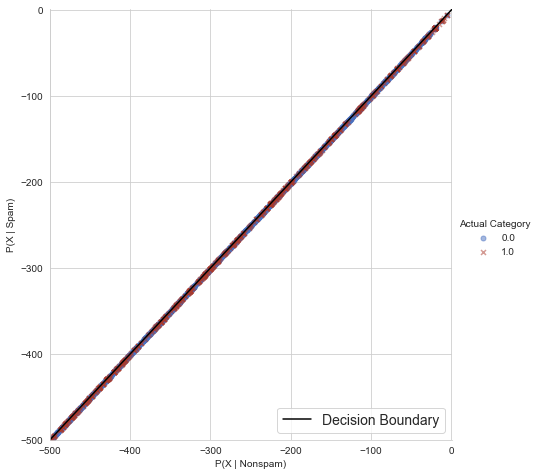

In [288]:
my_colors = ['#4A71C0', '#AB3A2C']
sns.lmplot(x = xaxis_label, y = yaxis_label, data = summary_df, size = 6.5, fit_reg = False,
          scatter_kws = {'alpha': 0.5, 's' : 25}, hue = labels, markers = ['o','x'], 
          palette = my_colors)

plt.xlim([-500, 1])
plt.ylim([-500, 1])

plt.plot(linedata, linedata, color = 'black' )

plt.legend({'Decision Boundary'}, loc = 'lower right', fontsize = 14)

plt.show()

# False positive and False negative

In [289]:
np.unique(prediction, return_counts = True)

(array([False]), array([4013], dtype=int64))

In [290]:
true_positives = (y_test == 1) & (prediction == 1)
true_positives.sum()

0

In [293]:
false_positives = (y_test == 0) & (prediction == 1)
false_positives.sum()

0

In [295]:
false_negatives = (y_test == 1) & (prediction == 0)
false_negatives.sum()

1248

# Recall Score

$$Recall Score = \frac{True \,  Positives} {True \, Positives \, + \, False \, Negatives}$$

In [301]:
recall_score = true_positives.sum() / (true_positives.sum() + false_negatives.sum())

In [303]:
recall_score

0.0

# Precision - measure of quality

$$Precision = \frac{True \,  Positives} {True \, Positives \, + \, False \, Positives}$$

In [307]:
precision_score = true_positives.sum() / (true_positives.sum() + false_positives.sum())
precision_score

<ipython-input-307-9f331409b4a4>:1: RuntimeWarning: invalid value encountered in long_scalars
  precision_score = true_positives.sum() / (true_positives.sum() + false_positives.sum())


nan

# F-Score or F1 Score

$$F-Score = 2 * \frac{Precision \, * \, Recall} {Precision\, + \, Recall}$$

In [308]:
f_score = 2 * (precision_score * recall_score) / (precision + recall_score)

In [309]:
f_score

nan

# Naive Bayes Implementation using Scikit Learn

In [310]:
data = pd.read_json(DATA_JSON_FILE)
data.tail()

MESSAGE  CATEGORY  \
5791  http://news.bbc.co.uk/1/hi/england/2515127.stm...         0   
5792  > >-- be careful when using this one.) Also, t...         0   
5793  >>>>> "SM" == Skip Montanaro <skip@pobox.com> ...         0   
5794  So then, "Mark Hammond" <mhammond@skippinet.co...         0   
5795  Hi there,\n\n\n\nNow this is probably of no us...         0   

                                   FILE_NAME  
5791  01396.61983fbe6ec43f55fd44e30fce24ffa6  
5792  01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7  
5793  01398.169b51731fe569f42169ae8f948ec676  
5794  01399.ca6b00b7b341bbde9a9ea3dd6a7bf896  
5795  01400.f897f0931e461e7b2e964d28e927c35e

In [311]:
data.shape

(5796, 3)

In [312]:
data.sort_index(inplace = True)

In [313]:
data.tail()

MESSAGE  CATEGORY  \
5791  http://news.bbc.co.uk/1/hi/england/2515127.stm...         0   
5792  > >-- be careful when using this one.) Also, t...         0   
5793  >>>>> "SM" == Skip Montanaro <skip@pobox.com> ...         0   
5794  So then, "Mark Hammond" <mhammond@skippinet.co...         0   
5795  Hi there,\n\n\n\nNow this is probably of no us...         0   

                                   FILE_NAME  
5791  01396.61983fbe6ec43f55fd44e30fce24ffa6  
5792  01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7  
5793  01398.169b51731fe569f42169ae8f948ec676  
5794  01399.ca6b00b7b341bbde9a9ea3dd6a7bf896  
5795  01400.f897f0931e461e7b2e964d28e927c35e

In [315]:
vectorizer = CountVectorizer(stop_words = 'english')

In [317]:
all_features = vectorizer.fit_transform(data.MESSAGE)

In [318]:
all_features.shape

(5796, 102694)

In [319]:
vectorizer.vocabulary_

{'doctype': 34865,
 'html': 48472,
 'public': 74013,
 'w3c': 93790,
 'dtd': 36354,
 'transitional': 88580,
 'en': 38432,
 'head': 47011,
 'meta': 61701,
 'content': 30249,
 '3d': 6385,
 'text': 86991,
 'charset': 27796,
 '3dwindows': 7297,
 '1252': 2025,
 'http': 48497,
 'equiv': 38991,
 '3dcontent': 6908,
 'ype': 99054,
 'mshtml': 63412,
 '00': 0,
 '2314': 4235,
 '1000': 1497,
 '3dgenerator': 6987,
 'body': 24390,
 'inserted': 52119,
 'calypso': 26557,
 'table': 86120,
 'border': 24581,
 '3d0': 6386,
 'cellpadding': 27375,
 'cellspacing': 27383,
 '3d2': 6525,
 'id': 49828,
 '3d_calyprintheader_': 6758,
 'ules': 90247,
 '3dnone': 7130,
 'style': 84723,
 'color': 29367,
 'black': 23893,
 'display': 34406,
 'width': 95488,
 '100': 1496,
 'tbody': 86462,
 'tr': 88442,
 'td': 86548,
 'colspan': 29390,
 '3d3': 6570,
 'hr': 48373,
 '3dblack': 6863,
 'noshade': 65849,
 'size': 82347,
 '3d1': 6417,
 'end': 38496,
 'font': 42257,
 '000000': 4,
 'face': 40498,
 '3dverdana': 7283,
 'arial': 20116

In [320]:
x_train, x_test, y_train, y_test = train_test_split(all_features, data.CATEGORY,
                                                   test_size = 0.3,
                                                   random_state = 88)

In [321]:
x_train.shape

(4057, 102694)

In [322]:
x_test.shape

(1739, 102694)

In [323]:
from sklearn.naive_bayes import MultinomialNB

In [324]:
classifier = MultinomialNB()

In [325]:
classifier.fit(x_train, y_train)

MultinomialNB()

**Challenge** 
Calculate the following for the test dataset <br>
The number of documents classified correctly <br>
The number of documents classified incorrectly <br>
The accuracy of the model

In [326]:
nr_of_correct_documents = (y_test == classifier.predict(x_test)).sum()
nr_of_correct_documents

1641

In [328]:
nr_of_incorrect_documents = (y_test.size - nr_of_correct_documents)
nr_of_incorrect_documents

98

In [332]:
fraction_incorrect_documents = nr_of_incorrect_documents / (nr_of_correct_documents + nr_of_incorrect_documents)
print('Fraction of incorrect documents are ', fraction_incorrect_documents)
model_accuracy = 1-fraction_incorrect_documents
print('Accuracy of the model is ', model_accuracy)

Fraction of incorrect documents are  0.05635422656699252
Accuracy of the model is  0.9436457734330075


In [333]:
classifier.score(x_test, y_test)

0.9436457734330075

**Challenge**
For the testing dataset, calculate the recall_score, precision_score and the f1_score.


In [336]:
from sklearn.metrics import recall_score, precision_score, f1_score

print('The recall score is ', recall_score(y_test, classifier.predict(x_test)))
print('The precision score is ', precision_score(y_test, classifier.predict(x_test)))
print('The f1 score is ', f1_score(y_test, classifier.predict(x_test)))

The recall score is  0.8303249097472925
The precision score is  0.9913793103448276
The f1 score is  0.9037328094302555


In [341]:
example = ['get viagra for free now',
          'need a morgage and get a quote?',
          'could you please help me with the project tomorrow?',
          'ski jumping for free']

In [342]:
document_term_matrix = vectorizer.transform(example)
classifier.predict(document_term_matrix)

array([1, 0, 0, 0], dtype=int64)